## Aspect-Based Sentiment Analysis using Logistic Regression pada Aplikasi Ulasan Marketplace

Pada proyek ini, dilakukan analisis sentimen berbasis aspek pada ulasan aplikasi marketplace Indonesia. Tujuan utama dari analisis ini adalah untuk mengevaluasi bagaimana pengguna merespons berbagai aspek dari aplikasi marketplace, seperti **Layanan**, **Fitur**, **Kebermanfaatan**, **Bisnis**, dan **Non Aspek**. Dengan menggunakan teknik analisis sentimen berbasis aspek, pemahaman terhadap perasaan pengguna terhadap setiap fitur dan komponen aplikasi dapat dilakukan dengan lebih mendalam.


## Exploratory Data Analysis (EDA)

Sebelum melakukan pemodelan, langkah pertama yang dilakukan adalah eksplorasi data (EDA) untuk mendapatkan wawasan lebih dalam mengenai distribusi data dan memahami karakteristik teks ulasan yang akan dianalisis.

EDA (Exploratory Data Analysis)

###  Load dan Pemeriksaan Dataset

#### Penyesuaian Delimiter: Titik Koma (`;`)

 *Catatan:*  
Berdasarkan tampilan awal data, terlihat bahwa file CSV menggunakan **tanda titik koma (`;`) sebagai delimiter antar kolom**. Kondisi ini umum terjadi pada file yang diekspor dari *Microsoft Excel*, khususnya dengan pengaturan regional tertentu seperti *Indonesia* atau beberapa negara di *Eropa*.

Agar data dapat terbaca dengan benar oleh `pandas`, perlu ditambahkan parameter `sep=';'` saat menggunakan fungsi `read_csv()`. Hal ini memastikan bahwa setiap kolom dipisahkan sesuai dengan struktur asli file.



In [86]:
# Import library
import pandas as pd

# Load dataset
df = pd.read_csv('dataset_final.csv', sep=';')


####  Pemeriksaan Lima Data Teratas

Melihat lima entri pertama dari dataset bertujuan untuk memahami struktur data, jenis kolom yang tersedia, serta format isi dari masing-masing kolom. Langkah ini penting sebagai tahap eksplorasi awal sebelum dilakukan pemrosesan lebih lanjut.



In [87]:
# Tampilkan 5 baris pertama
df.head()


userName  score                                            content  \
0   Kusyati Nisa      5  Mantaf skali mudah juga buat ikut pelatihan pr...   
1  Nurul Latifah      5                    keren buat beli kartu prakerjaa   
2    Lukman Hadi      1  Lapak saya dibekukan, sudah komplain tidak ada...   
3  Felisona Hulu      1  Benar2 mengecewakan.Respon sangat lama.pokok n...   
4     Don faizal      5  Ini adalah salah satu tempat terbaik untuk bel...   

   Layanan  Fitur  Kebermanfaatan  Bisnis  Non Aspek  
0        0      0               1       0          0  
1        0      0               0       0          1  
2       -1      0               0       0          0  
3       -1      0               0       0          0  
4        1      0               0       0          0

In [88]:
print(df.columns)

Index(['userName', 'score', 'content', 'Layanan', 'Fitur', 'Kebermanfaatan',
       'Bisnis', 'Non Aspek'],
      dtype='object')


#### Struktur Kolom pada Dataset

Dataset ini memiliki beberapa kolom dengan fungsi dan makna sebagai berikut:

- `userName` : Nama pengguna yang memberikan ulasan.  
- `score` : Nilai rating dari pengguna dalam skala **1 hingga 5**.  
- `content` : Teks ulasan yang ditulis oleh pengguna.  
- `Layanan`, `Fitur`, `Kebermanfaatan`, `Bisnis`, `Non Aspek` : Merupakan *aspek-aspek* yang dapat muncul dalam setiap ulasan, dengan nilai:

  - `1` : Menunjukkan sentimen **positif** terhadap aspek tersebut.  
  - `-1` : Menunjukkan sentimen **negatif** terhadap aspek tersebut.  
  - `0` : Aspek **tidak disebutkan** atau **tidak relevan** dalam ulasan (bukan berarti netral).

> **Catatan:**  
> Dataset ini termasuk dalam kategori *multi-label classification*, karena satu ulasan dapat mengandung lebih dari satu aspek secara bersamaan, masing-masing dengan sentimen yang berbeda.


####  Informasi Dasar Dataset

Langkah ini bertujuan untuk menampilkan ringkasan struktur dataset, termasuk jumlah entri, tipe data tiap kolom, serta keberadaan nilai yang hilang (*missing values*), jika ada.

Fungsi `df.info()` dari *pandas* sangat berguna untuk melakukan inspeksi awal terhadap kualitas dan struktur data.


In [89]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userName        3000 non-null   object
 1   score           3000 non-null   int64 
 2   content         3000 non-null   object
 3   Layanan         3000 non-null   int64 
 4   Fitur           3000 non-null   int64 
 5   Kebermanfaatan  3000 non-null   int64 
 6   Bisnis          3000 non-null   int64 
 7   Non Aspek       3000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 187.6+ KB


####  Hasil Observasi Awal berdasarkan output diatas

- Dataset terdiri dari **3.000 baris data**.  
- **Tidak ditemukan nilai yang hilang** (*missing values*) pada kolom manapun.  
- Semua kolom telah memiliki **tipe data yang sesuai** untuk analisis lebih lanjut.


### Distribusi Sentimen per Aspek

Untuk memahami bagaimana ulasan pengguna tersebar pada masing-masing aspek — yaitu `Layanan`, `Fitur`, `Kebermanfaatan`, `Bisnis`, dan `Non Aspek` — jumlah sentimen yang muncul untuk setiap label dapat dihitung, yaitu:

- `1` : Sentimen **positif**  
- `-1` : Sentimen **negatif**  
- `0` : Aspek **tidak disebutkan** atau non sentimen  

Analisis ini berguna untuk:

- Mengidentifikasi aspek yang paling sering disebutkan oleh pengguna.  
- Mengetahui kecenderungan sentimen dominan (positif, negatif, atau non-sentimen) pada tiap aspek.


In [90]:
# Daftar kolom aspek
aspek_cols = ['Layanan', 'Fitur', 'Kebermanfaatan', 'Bisnis', 'Non Aspek']

# Hitung distribusi sentimen untuk setiap aspek
sentiment_distribution = df[aspek_cols].apply(pd.Series.value_counts).T.fillna(0)
sentiment_distribution.columns = ['Negatif (-1)', 'Tidak Disebut (0)', 'Positif (1)']
sentiment_distribution = sentiment_distribution.astype(int)

# Tampilkan distribusi
sentiment_distribution


Negatif (-1)  Tidak Disebut (0)  Positif (1)
Layanan                  444               2269          287
Fitur                    509               2124          367
Kebermanfaatan            37               2399          564
Bisnis                   517               1967          516
Non Aspek                440               2144          416

>Berdasarkan tabel distribusi di atas, dapat diamati persebaran sentimen untuk masing-masing aspek. Beberapa temuan yang dapat disorot antara lain:

- Aspek **`Layanan`** menunjukkan jumlah sentimen **negatif** yang lebih tinggi dibandingkan sentimen positif.
- Aspek **`Kebermanfaatan`** cenderung memperoleh lebih banyak sentimen **positif**.
- Nilai **`0`** pada setiap aspek mengindikasikan bahwa aspek tersebut **tidak disebutkan** dalam ulasan.




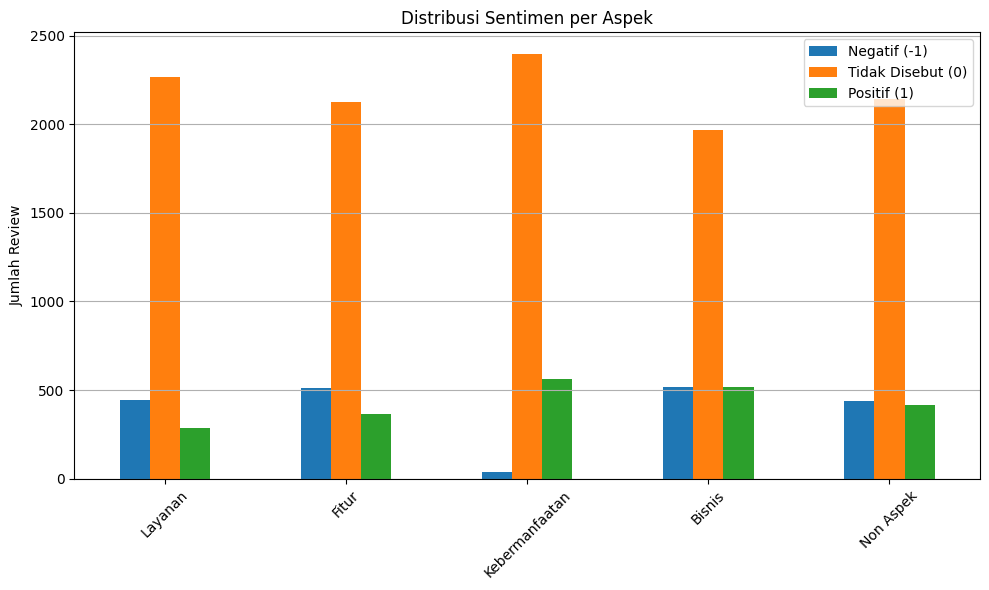

In [91]:
# Visualisasi distribusi dengan bar chart
import matplotlib.pyplot as plt

# Bar chart untuk distribusi sentimen per aspek
sentiment_distribution.plot(kind='bar', figsize=(10, 6))
plt.title("Distribusi Sentimen per Aspek")
plt.ylabel("Jumlah Review")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Contoh Review Berdasarkan Label Sentimen

Untuk memahami karakteristik ulasan yang diberi label sentimen tertentu (positif maupun negatif) pada setiap aspek, kita akan menampilkan beberapa contoh review berdasarkan label yang dimilikinya dengan tujuan untuk memberikan **intuisi yang lebih jelas** mengenai isi review serta bagaimana keterkaitannya dengan masing-masing aspek.


In [92]:
def tampilkan_contoh_review(aspek, label):
    return df[df[aspek] == label][['content', aspek]].sample(3, random_state=42)

print("Contoh review negatif tentang Layanan:")
display(tampilkan_contoh_review('Fitur', -1))

print("Contoh review positif tentang Layanan:")
display(tampilkan_contoh_review('Fitur', 1))

print("Contoh review tanpa sentimen tentang Layanan:")
display(tampilkan_contoh_review('Fitur', 0))

print("Contoh review negatif tentang Fitur:")
display(tampilkan_contoh_review('Fitur', -1))

print("Contoh review positif tentang Fitur:")
display(tampilkan_contoh_review('Fitur', 1))

print("Contoh review tanpa sentimen terhadap Fitur:")
display(tampilkan_contoh_review('Fitur', 0))

print("Contoh review positif tentang Kebermanfaatan:")
display(tampilkan_contoh_review('Kebermanfaatan', 1))

print("Contoh review negatif tentang Kebermanfaatan:")
display(tampilkan_contoh_review('Kebermanfaatan', -1))

print("Contoh review tanpa sentimen terhadap Kebermanfaatan:")
display(tampilkan_contoh_review('Kebermanfaatan', 0))


Contoh review negatif tentang Layanan:


content  Fitur
575   sy udah bayar briva tp transaksi kadaluarsa ka...     -1
2277  hm ulasan saya kok bisa ilang ya. aplikasi bel...     -1
2942  Kemarin fitur lapak langganan bermasalah. Seka...     -1

Contoh review positif tentang Layanan:


content  Fitur
1503  Mamtap n lancar ni apliikasi ..barang komplit ...      1
216   Mantap banget kak saya suka aplikasinya bisnis...      1
99    Aplikasi bagus, terima kasih buka lapak sudah ...      1

Contoh review tanpa sentimen tentang Layanan:


content  Fitur
98    Sangat membantu utk transaksi jual beli barang...      0
2375  Jualan dibukalapak ngenes banget,barang laku,s...      0
2561  ngetik judul hp yg muncul malah kebanykan spar...      0

Contoh review negatif tentang Fitur:


content  Fitur
575   sy udah bayar briva tp transaksi kadaluarsa ka...     -1
2277  hm ulasan saya kok bisa ilang ya. aplikasi bel...     -1
2942  Kemarin fitur lapak langganan bermasalah. Seka...     -1

Contoh review positif tentang Fitur:


content  Fitur
1503  Mamtap n lancar ni apliikasi ..barang komplit ...      1
216   Mantap banget kak saya suka aplikasinya bisnis...      1
99    Aplikasi bagus, terima kasih buka lapak sudah ...      1

Contoh review tanpa sentimen terhadap Fitur:


content  Fitur
98    Sangat membantu utk transaksi jual beli barang...      0
2375  Jualan dibukalapak ngenes banget,barang laku,s...      0
2561  ngetik judul hp yg muncul malah kebanykan spar...      0

Contoh review positif tentang Kebermanfaatan:


content  Kebermanfaatan
2684  Terimakasih bukalapak sangat membantu dalam me...               1
2653  Terimakasih bukapalak karena sudah mempermudah...               1
1204  Aplikasi yang sangat bersahabat dan membantu u...               1

Contoh review negatif tentang Kebermanfaatan:


content  Kebermanfaatan
2116  Dri kemarin sy daftra buat jualan di buka lapa...              -1
1769  Proses live chat lama, ribet, tidak membantu. ...              -1
901   Menurut saya applikasi ini sangat tidak bergun...              -1

Contoh review tanpa sentimen terhadap Kebermanfaatan:


content  Kebermanfaatan
2553  Server nya tambah lamban sepertinya, seringkal...               0
2489  Akun saya dibekukan tanpa pemberitahuan. Padah...               0
1072  Akun pay later dibekukan padahal baru bayar ta...               0

### Jumlah Aspek yang Disebutkan dalam Setiap Ulasan

Pada bagian ini, dilakukan analisis untuk mengetahui sejauh mana pengguna menyebutkan berbagai aspek dalam setiap ulasan yang mereka berikan.

Tujuan dari analisis ini adalah untuk mengidentifikasi apakah pengguna umumnya hanya menyebutkan **satu aspek saja**, atau justru membahas **lebih dari satu aspek sekaligus** dalam satu entri ulasan.

Analisis ini dilakukan dengan menghitung jumlah kolom aspek yang memiliki nilai selain `0`, yaitu `1` (positif) atau `-1` (negatif), pada masing-masing ulasan. Kolom aspek yang dianalisis meliputi:

- `Layanan`
- `Fitur`
- `Kebermanfaatan`
- `Bisnis`
- `Non Aspek`




In [93]:
# Hitung jumlah aspek yang disebut (nilai != 0) per baris
df['jumlah_aspek_disebut'] = df[aspek_cols].apply(lambda row: (row != 0).sum(), axis=1)

# Lihat distribusi jumlah aspek disebut
aspek_count_distribution = df['jumlah_aspek_disebut'].value_counts().sort_index()
aspek_count_distribution


jumlah_aspek_disebut
0       2
1    2061
2     788
3     136
4      13
Name: count, dtype: int64

### Wordcloud – Visualisasi Frekuensi Kemunculan Kata

Wordcloud merupakan salah satu teknik visualisasi yang umum digunakan dalam proses *Exploratory Data Analysis* (EDA) untuk data berbasis teks. Visualisasi ini menampilkan kata-kata yang paling sering muncul dalam kumpulan data teks — di mana ukuran kata akan semakin besar apabila frekuensi kemunculannya semakin tinggi.

####  Langkah-Langkah:

1. Menggabungkan seluruh teks ulasan dari kolom `content`.
2. Melakukan pembersihan teks, seperti menghapus tanda baca, angka, dan karakter yang tidak relevan.
3. Menampilkan Wordcloud untuk keseluruhan ulasan.


Sebagai tambahan, disini juga dapat membangun Wordcloud secara terpisah berdasarkan:

- Sentimen (positif, negatif, netral)
- Aspek tertentu (misalnya `Layanan`, `Fitur`, dll.)

Hal ini dapat memberikan wawasan yang lebih mendalam mengenai kata-kata umum yang digunakan pengguna dalam ulasan. 


In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Fungsi pembersih teks
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Hilangkan tanda baca
    text = re.sub(r'\d+', '', text)      # Hilangkan angka
    text = text.lower()                  # Huruf kecil
    return text

# Fungsi untuk membuat wordcloud berdasarkan aspek & sentimen
def generate_wordcloud(aspek, label, label_name):
    subset = df[df[aspek] == label]['content']
    combined_text = ' '.join(subset.astype(str).tolist())
    cleaned = clean_text(combined_text)
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(cleaned)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Wordcloud – Review {label_name} tentang {aspek}")
    plt.show()


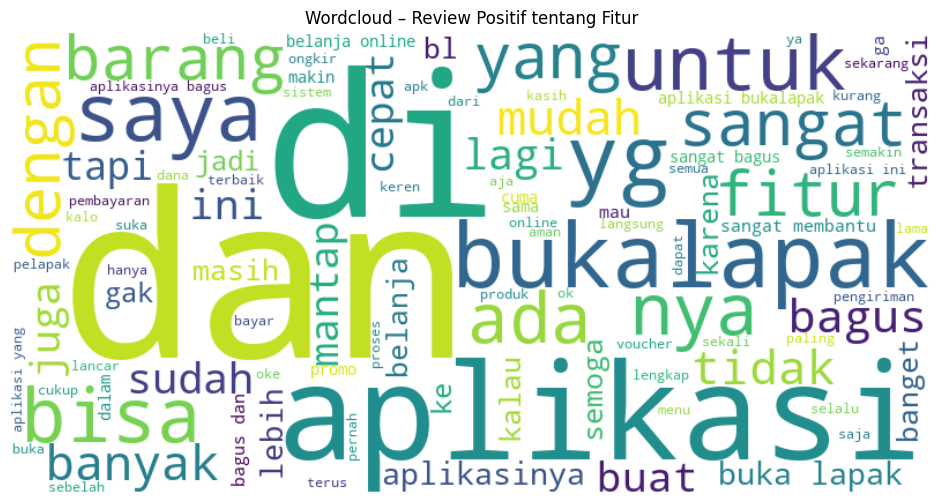

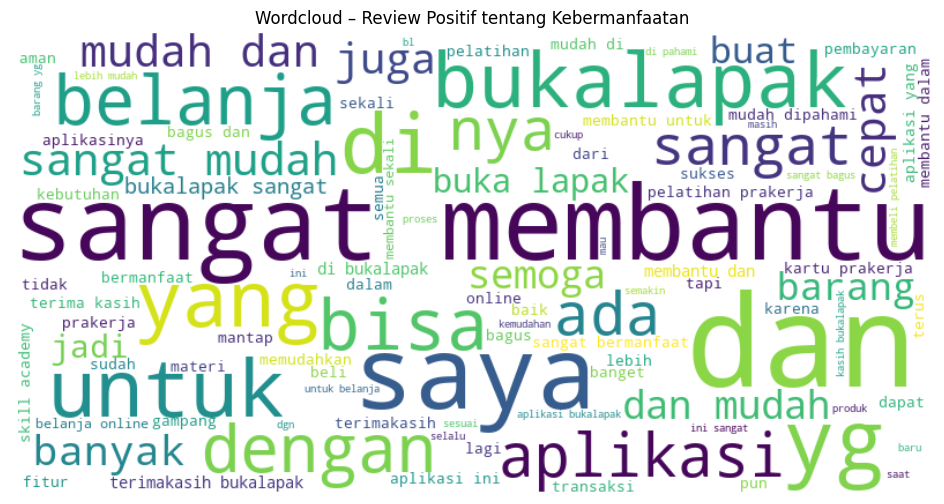

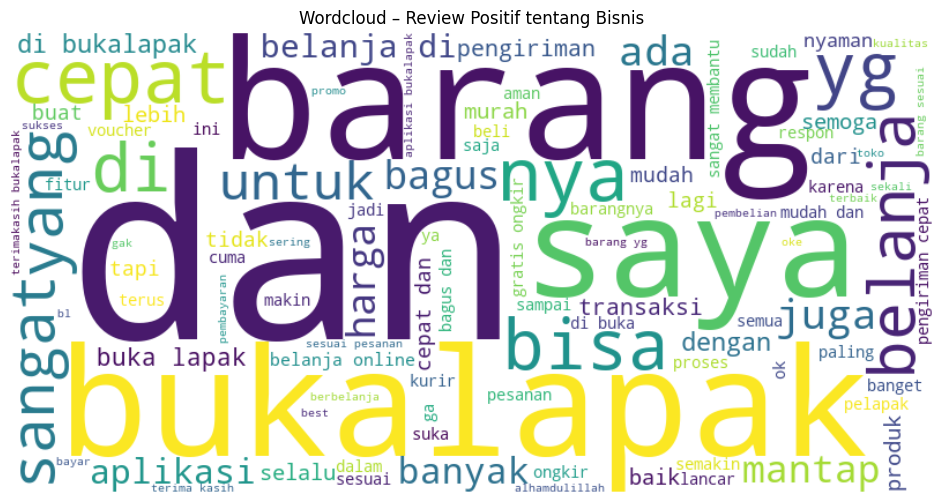

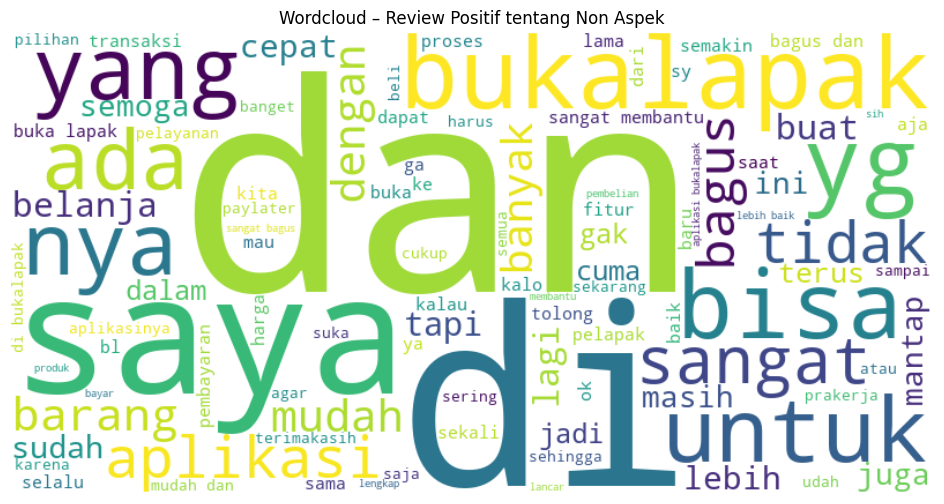

In [95]:
# Wordcloud untuk review positif pada masing-masing aspek
generate_wordcloud('Fitur', 1, 'Positif')
generate_wordcloud('Kebermanfaatan', 1, 'Positif')
generate_wordcloud('Bisnis', 1, 'Positif')
generate_wordcloud('Non Aspek', 1, 'Positif')


### Wordcloud untuk Sentimen Negatif dan Non-Sentimen per Aspek

Setelah menampilkan Wordcloud untuk ulasan dengan sentimen positif, selanjutnya akan melakukan visualisasi untuk dua kategori lain, yaitu:

1. **Sentimen Negatif**  
   Menampilkan kata-kata yang paling sering digunakan dalam ulasan dengan sentimen negatif, untuk setiap aspek (seperti `Layanan`, `Fitur`, dan lain-lain). Hal ini bertujuan untuk memahami konteks keluhan atau kritik yang sering disampaikan oleh pengguna.

2. **Non-Sentimen**  
   Visualisasi ini mencakup kata-kata yang muncul dalam ulasan yang dikategorikan sebagai netral atau tidak memuat sentimen emosional yang kuat. Analisis ini penting untuk mengetahui apakah ulasan netral cenderung bersifat deskriptif atau bersifat umum tanpa kecenderungan emosional.



Wordcloud untuk review NEGATIF pada masing-masing aspek

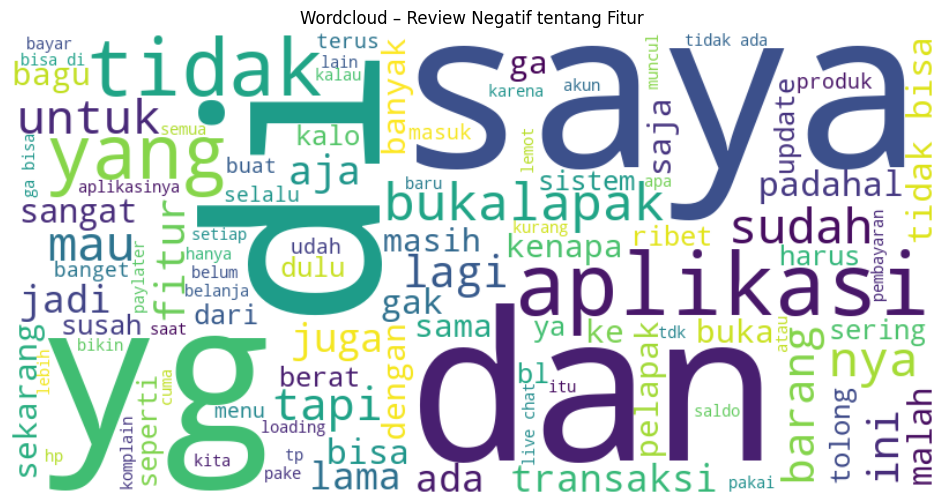

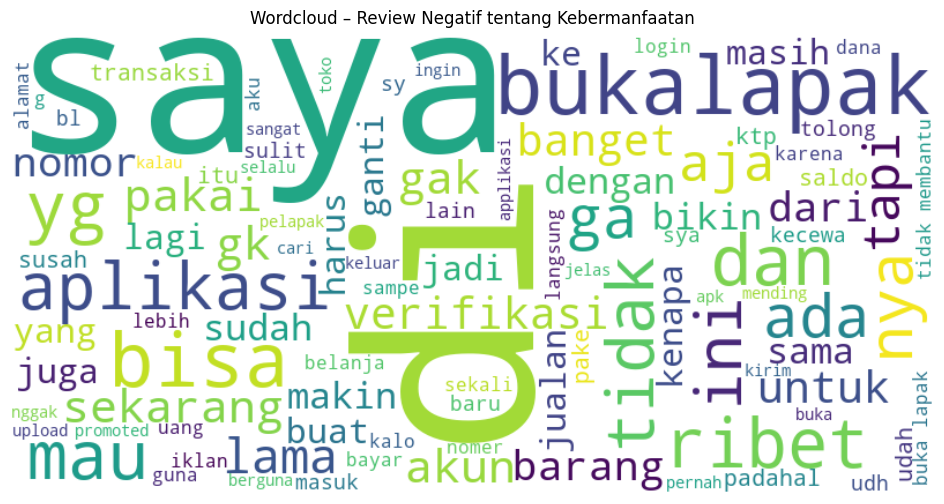

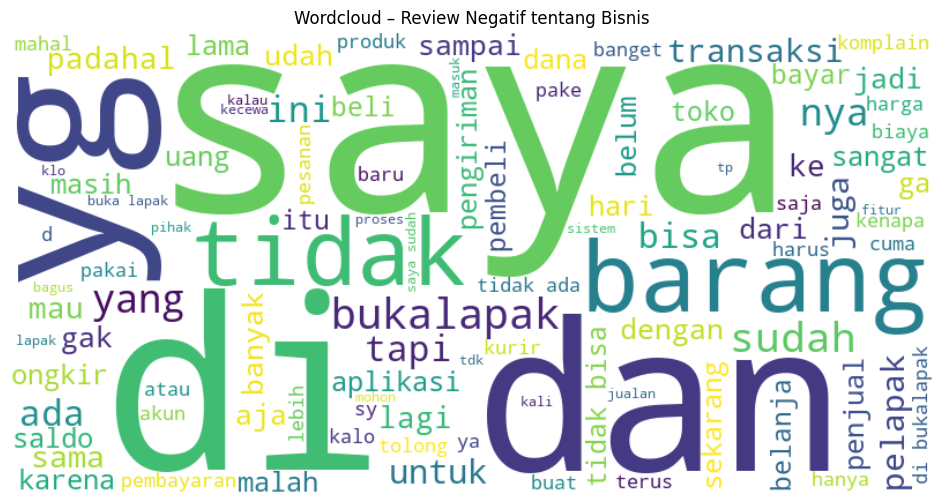

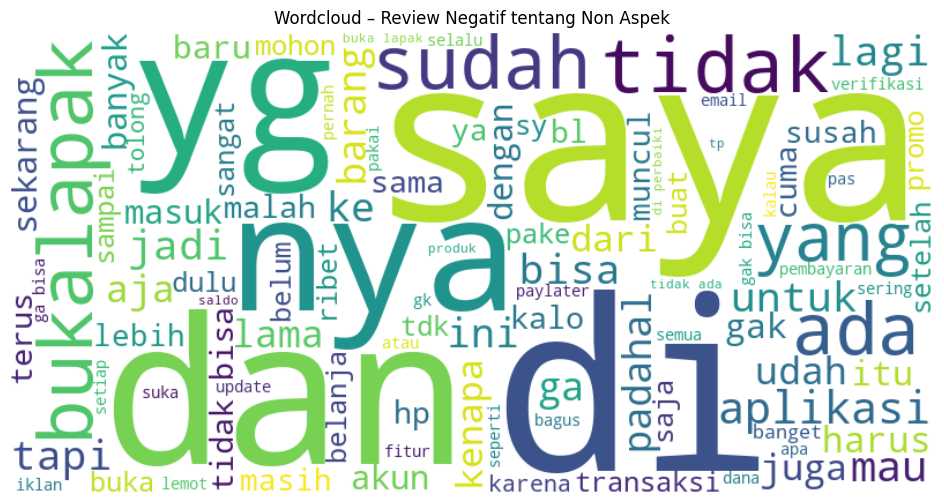

In [96]:
# Wordcloud untuk review NEGATIF pada masing-masing aspek
generate_wordcloud('Fitur', -1, 'Negatif')
generate_wordcloud('Kebermanfaatan', -1, 'Negatif')
generate_wordcloud('Bisnis', -1, 'Negatif')
generate_wordcloud('Non Aspek', -1, 'Negatif')




Wordcloud untuk review TANPA SENTIMEN (label 0) per aspek

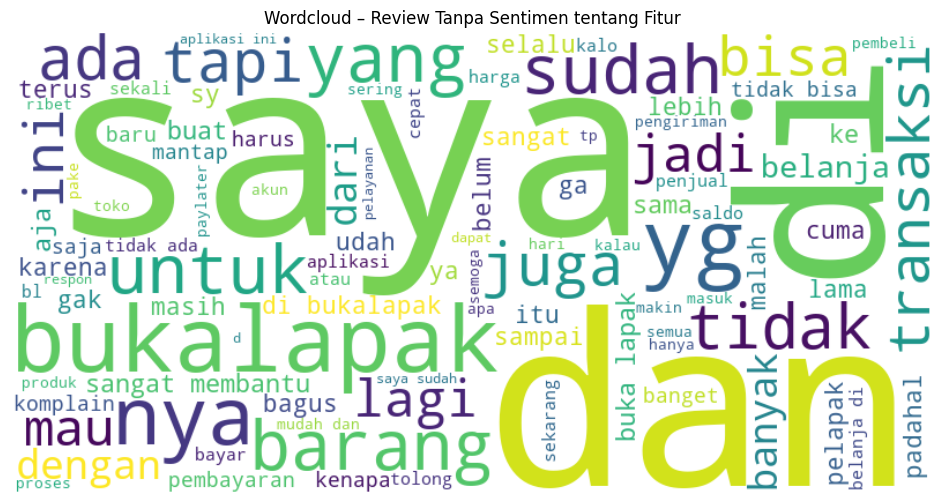

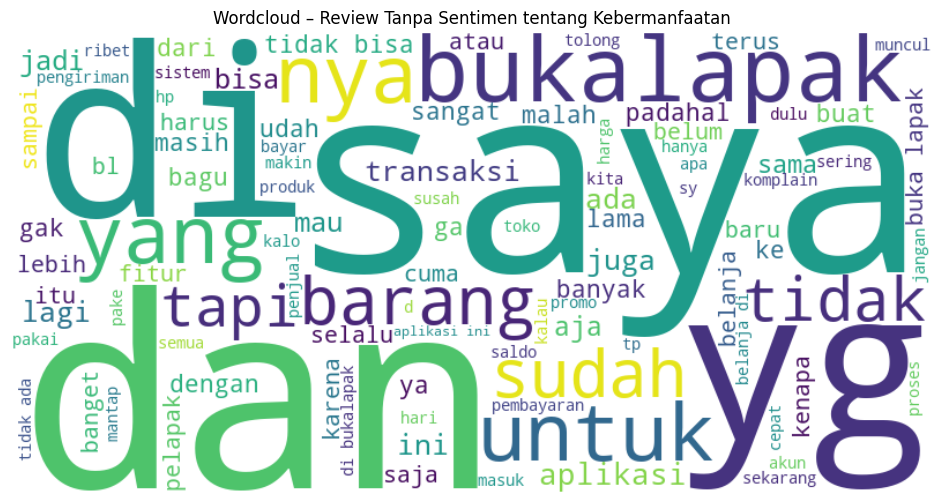

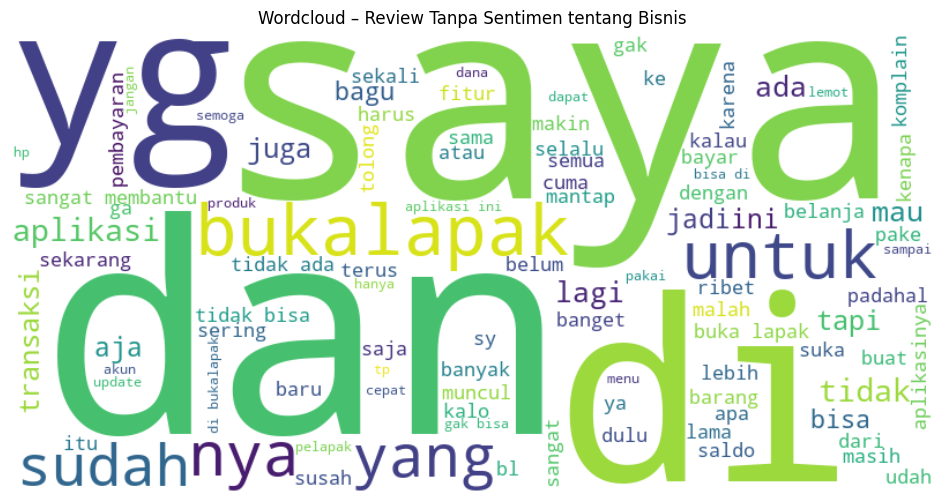

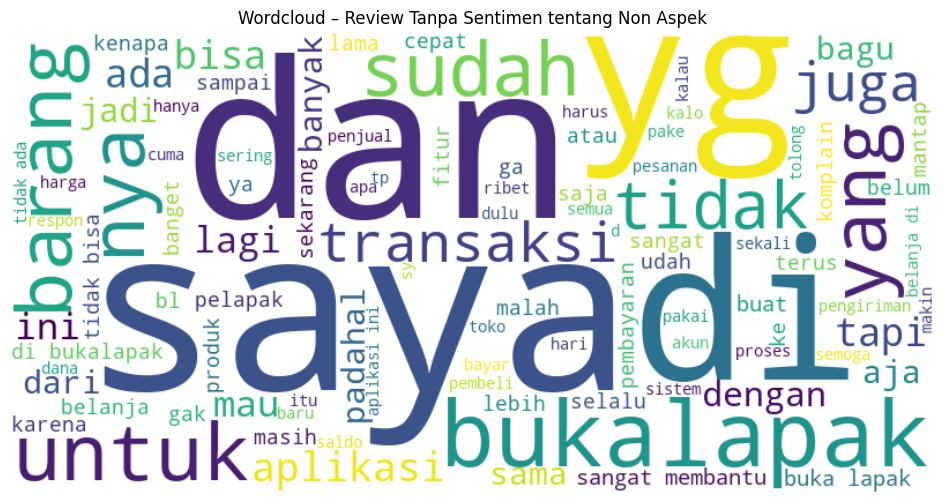

In [97]:
# Wordcloud untuk review TANPA SENTIMEN (label 0) per aspek
generate_wordcloud('Fitur', 0, 'Tanpa Sentimen')
generate_wordcloud('Kebermanfaatan', 0, 'Tanpa Sentimen')
generate_wordcloud('Bisnis', 0, 'Tanpa Sentimen')
generate_wordcloud('Non Aspek', 0, 'Tanpa Sentimen')

Melalui visualisasi ini, dapat dikenali dengan cepat topik atau kata-kata penting yang sering muncul dalam ulasan. Pendekatan ini membantu dalam mengidentifikasi fokus utama pengguna, terutama dalam konteks sentimen negatif dan non-sentimen terhadap masing-masing aspek.


### Preprocessing Data Teks

Sebelum data teks digunakan dalam proses pemodelan, tahap *preprocessing* dilakukan untuk membersihkan dan menstandarkan isi ulasan. Langkah-langkah preprocessing penting agar teks dapat diproses dengan efektif oleh algoritma pembelajaran mesin dan menghasilkan representasi fitur yang bermakna.

Berikut adalah langkah-langkah preprocessing yang dilakukan:

1. **Case Folding**  
   Mengubah semua huruf dalam teks menjadi huruf kecil (lowercasing) untuk menyamakan representasi kata. Misalnya, kata "Aplikasi" dan "aplikasi" dianggap sama.

2. **Cleaning**  
   Menghapus tanda baca, angka, dan karakter khusus yang tidak memberikan kontribusi terhadap pemahaman sentimen dalam teks.

3. **Tokenisasi**  
   Memecah teks menjadi unit-unit yang lebih kecil, seperti kata atau frasa, untuk mempermudah pemrosesan lebih lanjut.

4. **Penghapusan Stopwords**  
   Menghapus kata-kata umum yang tidak membawa makna penting dalam analisis, seperti "yang", "dan", "adalah", dan sebagainya.

5. **Normalisasi**  
   Mengoreksi kata-kata tidak baku atau kesalahan ketik (typo) agar sesuai dengan bentuk kata yang benar menggunakan kamus normalisasi.

6. **Stemming**  
   Mengubah kata-kata menjadi bentuk dasarnya untuk menyatukan variasi kata yang memiliki makna serupa. Misalnya, "berjalan" diubah menjadi "jalan".

Langkah-langkah ini bertujuan untuk menghasilkan teks yang lebih bersih, seragam, dan siap untuk diekstraksi fitur menggunakan metode seperti TF-IDF.


#### 1. Case Folding – Mengubah Teks ke Huruf Kecil

Case folding merupakan langkah awal dalam proses *preprocessing* teks yang bertujuan untuk mengubah seluruh karakter dalam teks menjadi **huruf kecil (lowercase)**.  
Langkah ini penting untuk memastikan bahwa variasi dalam kapitalisasi tidak menyebabkan kata-kata yang sebenarnya sama diperlakukan berbeda oleh model.

Contoh transformasi:

- **Sebelum:** `"Aplikasi Ini Sangat Berguna"`  
- **Sesudah:** `"aplikasi ini sangat berguna"`

Dengan melakukan case folding, model dapat mengenali kata secara konsisten tanpa membedakan huruf besar dan kecil.


In [98]:
# Ubah semua teks menjadi huruf kecil
df['casefolded'] = df['content'].str.lower()

# Tampilkan contoh
df[['content', 'casefolded']].head()


content  \
0  Mantaf skali mudah juga buat ikut pelatihan pr...   
1                    keren buat beli kartu prakerjaa   
2  Lapak saya dibekukan, sudah komplain tidak ada...   
3  Benar2 mengecewakan.Respon sangat lama.pokok n...   
4  Ini adalah salah satu tempat terbaik untuk bel...   

                                          casefolded  
0  mantaf skali mudah juga buat ikut pelatihan pr...  
1                    keren buat beli kartu prakerjaa  
2  lapak saya dibekukan, sudah komplain tidak ada...  
3  benar2 mengecewakan.respon sangat lama.pokok n...  
4  ini adalah salah satu tempat terbaik untuk bel...

In [99]:
print(df.columns)

Index(['userName', 'score', 'content', 'Layanan', 'Fitur', 'Kebermanfaatan',
       'Bisnis', 'Non Aspek', 'jumlah_aspek_disebut', 'casefolded'],
      dtype='object')


### 2. Cleaning – Menghapus Angka, Tanda Baca, dan Simbol

Pada tahap ini, teks dibersihkan dari karakter-karakter yang tidak diperlukan dalam proses analisis, seperti:

- **Angka**, misalnya: `benar2` → `benar`
- **Simbol dan tanda baca**, misalnya: `!`, `.`, `,`, `@`
- **Karakter non-huruf** lainnya yang tidak berkontribusi terhadap makna utama teks

Tujuan dari proses *cleaning* ini adalah untuk menyisakan hanya **kata-kata penting dalam format yang bersih** dan konsisten sehingga dapat diproses secara optimal pada tahap selanjutnya.

 *Perbaikan khusus yang diterapkan dalam proses ini:*
- Tanda baca dan simbol diubah menjadi spasi agar kata-kata tetap terpisah dengan baik.
- Angka dihapus dari dalam kata (bukan hanya sebagai token terpisah), sehingga tidak mengganggu interpretasi linguistik kata tersebut.


In [100]:
def better_clean_text(text):
    text = re.sub(r'\d+', '', text)           # Hapus angka dulu
    text = re.sub(r'[^a-z]', ' ', text)       # Ganti non-huruf jadi spasi
    text = re.sub(r'\s+', ' ', text)          # Hapus spasi berulang
    return text.strip()



# Terapkan ke teks yang sudah casefolded
df['cleaned'] = df['casefolded'].apply(better_clean_text)

# Lihat hasil perbaikannya
df[['casefolded', 'cleaned']].head()


casefolded  \
0  mantaf skali mudah juga buat ikut pelatihan pr...   
1                    keren buat beli kartu prakerjaa   
2  lapak saya dibekukan, sudah komplain tidak ada...   
3  benar2 mengecewakan.respon sangat lama.pokok n...   
4  ini adalah salah satu tempat terbaik untuk bel...   

                                             cleaned  
0  mantaf skali mudah juga buat ikut pelatihan pr...  
1                    keren buat beli kartu prakerjaa  
2  lapak saya dibekukan sudah komplain tidak ada ...  
3  benar mengecewakan respon sangat lama pokok ny...  
4  ini adalah salah satu tempat terbaik untuk bel...

In [101]:
print(df.columns)


Index(['userName', 'score', 'content', 'Layanan', 'Fitur', 'Kebermanfaatan',
       'Bisnis', 'Non Aspek', 'jumlah_aspek_disebut', 'casefolded', 'cleaned'],
      dtype='object')


### 3 Tokenization – Memecah Kalimat Menjadi Kata (Token)

Tokenization merupakan proses memecah kalimat atau teks menjadi potongan-potongan kecil yang disebut **token**, yang umumnya berupa kata.  
Langkah ini sangat penting karena hampir semua metode pemrosesan teks membutuhkan representasi data dalam bentuk token untuk analisis lebih lanjut.

Tokenization diperlukan sebelum menjalankan proses-proses seperti:
- Penghapusan stopword (*stopword removal*)
- Pembobotan dengan TF-IDF
- Proses stemming

Contoh tokenisasi:

- **Input:** `"mantaf skali mudah juga buat ikut pelatihan"`  
- **Output:** `["mantaf", "skali", "mudah", "juga", "buat", "ikut", "pelatihan"]`

Dengan tokenisasi, setiap kata dalam kalimat dapat diproses secara individual sesuai kebutuhan model analisis.


In [102]:
# Tokenisasi sederhana dengan .split()
df['tokens'] = df['cleaned'].apply(lambda x: x.split())

# Tampilkan hasil
df[['cleaned', 'tokens']].head()


cleaned  \
0  mantaf skali mudah juga buat ikut pelatihan pr...   
1                    keren buat beli kartu prakerjaa   
2  lapak saya dibekukan sudah komplain tidak ada ...   
3  benar mengecewakan respon sangat lama pokok ny...   
4  ini adalah salah satu tempat terbaik untuk bel...   

                                              tokens  
0  [mantaf, skali, mudah, juga, buat, ikut, pelat...  
1              [keren, buat, beli, kartu, prakerjaa]  
2  [lapak, saya, dibekukan, sudah, komplain, tida...  
3  [benar, mengecewakan, respon, sangat, lama, po...  
4  [ini, adalah, salah, satu, tempat, terbaik, un...

In [103]:
print(df.columns)


Index(['userName', 'score', 'content', 'Layanan', 'Fitur', 'Kebermanfaatan',
       'Bisnis', 'Non Aspek', 'jumlah_aspek_disebut', 'casefolded', 'cleaned',
       'tokens'],
      dtype='object')


### 4. Penghapusan Stopword – Menghapus Kata-Kata Umum yang Tidak Memiliki Makna Penting

Stopword merujuk pada kata-kata umum dalam suatu bahasa yang tidak memberikan kontribusi signifikan terhadap makna kalimat, seperti:  
_"yang", "di", "dengan", "dan", "atau", "pada"_, dan seterusnya.

Kata-kata ini **tidak memiliki peran penting dalam pemodelan** dan oleh karena itu sebaiknya dihapus untuk meningkatkan kualitas analisis.

Pada tahap ini, daftar stopword bawaan dari pustaka `nltk` untuk Bahasa Indonesia akan digunakan dalam proses penghapusan stopword.


In [104]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Daftar stopwords Bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Hapus stopword dari token
df['filtered'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Tampilkan hasil
df[['tokens', 'filtered']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


tokens  \
0  [mantaf, skali, mudah, juga, buat, ikut, pelat...   
1              [keren, buat, beli, kartu, prakerjaa]   
2  [lapak, saya, dibekukan, sudah, komplain, tida...   
3  [benar, mengecewakan, respon, sangat, lama, po...   
4  [ini, adalah, salah, satu, tempat, terbaik, un...   

                                            filtered  
0  [mantaf, skali, mudah, pelatihan, prakerja, mu...  
1                    [keren, beli, kartu, prakerjaa]  
2  [lapak, dibekukan, komplain, tanggapan, ditutu...  
3  [mengecewakan, respon, pokok, nya, d, rekomended]  
4  [salah, terbaik, belanja, online, penjual, pem...

In [105]:
print(df.columns)

Index(['userName', 'score', 'content', 'Layanan', 'Fitur', 'Kebermanfaatan',
       'Bisnis', 'Non Aspek', 'jumlah_aspek_disebut', 'casefolded', 'cleaned',
       'tokens', 'filtered'],
      dtype='object')


### 5. Normalisasi Slang / Typo 

Stemming tidak dapat bekerja dengan baik pada kata-kata **yang tidak baku atau memiliki kesalahan ketik (typo)**, seperti misalnya:
- `mantaf` → tidak akan distem menjadi `mantap`
- `rekomen` → tidak dikenali oleh stemmer

Untuk itu, diperlukan penerapan **kamus normalisasi** untuk memperbaiki kata-kata tersebut sebelum dilakukan stemming.

Langkah-langkah yang akan dilakukan adalah:
1. Menyusun kamus dalam file berformat `.json`
2. Memuat kamus ke dalam Python
3. Menerapkan normalisasi pada hasil token yang sudah dihapus stopword


In [106]:
import json

# Load kamus dari file JSON
with open('kamus_normalisasi.json', 'r', encoding='utf-8') as f:
    kamus_normalisasi = json.load(f)

# Fungsi untuk menormalisasi list token
def normalize_token_list(token_list):
    return [kamus_normalisasi.get(word, word) for word in token_list]

# Terapkan normalisasi ke token hasil stopword removal
df['normalized'] = df['filtered'].apply(normalize_token_list)

# Lihat hasil
df[['filtered', 'normalized']].head()


filtered  \
0  [mantaf, skali, mudah, pelatihan, prakerja, mu...   
1                    [keren, beli, kartu, prakerjaa]   
2  [lapak, dibekukan, komplain, tanggapan, ditutu...   
3  [mengecewakan, respon, pokok, nya, d, rekomended]   
4  [salah, terbaik, belanja, online, penjual, pem...   

                                          normalized  
0  [mantap, sekali, mudah, pelatihan, prakerja, m...  
1                     [keren, beli, kartu, prakerja]  
2  [lapak, dibekukan, komplain, tanggapan, ditutu...  
3  [mengecewakan, respon, pokok, nya, d, rekomended]  
4  [salah, terbaik, belanja, online, penjual, pem...

In [107]:
print(df.columns)

Index(['userName', 'score', 'content', 'Layanan', 'Fitur', 'Kebermanfaatan',
       'Bisnis', 'Non Aspek', 'jumlah_aspek_disebut', 'casefolded', 'cleaned',
       'tokens', 'filtered', 'normalized'],
      dtype='object')


In [108]:
df.columns

Index(['userName', 'score', 'content', 'Layanan', 'Fitur', 'Kebermanfaatan',
       'Bisnis', 'Non Aspek', 'jumlah_aspek_disebut', 'casefolded', 'cleaned',
       'tokens', 'filtered', 'normalized'],
      dtype='object')

In [109]:
import json
import re

# Load kamus normalisasi (sesuaikan path jika perlu)
with open('kamus_normalisasi.json', 'r', encoding='utf-8') as f:
    kamus_normalisasi = json.load(f)

# Fungsi preprocessing + normalisasi
def preprocess_and_normalize(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # hapus simbol dan angka
    tokens = text.split()
    normalized_tokens = [kamus_normalisasi.get(token, token) for token in tokens]
    return ' '.join(normalized_tokens)


In [110]:
print(df.columns)

Index(['userName', 'score', 'content', 'Layanan', 'Fitur', 'Kebermanfaatan',
       'Bisnis', 'Non Aspek', 'jumlah_aspek_disebut', 'casefolded', 'cleaned',
       'tokens', 'filtered', 'normalized'],
      dtype='object')


### 6. Stemming – Mengubah Kata ke Bentuk Dasarnya

Stemming merupakan proses untuk mengubah kata-kata menjadi bentuk dasarnya, seperti misalnya:
- "berjalan" → "jalan"
- "dibekukan" → "beku"
- "pelatihan" → "latih"

Untuk Bahasa Indonesia, proses stemming ini akan dilakukan dengan menggunakan pustaka **Sastrawi**, yang telah disesuaikan dengan morfologi bahasa Indonesia.


In [111]:
print(df.columns)


Index(['userName', 'score', 'content', 'Layanan', 'Fitur', 'Kebermanfaatan',
       'Bisnis', 'Non Aspek', 'jumlah_aspek_disebut', 'casefolded', 'cleaned',
       'tokens', 'filtered', 'normalized'],
      dtype='object')


In [112]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Terapkan stemming ke hasil normalisasi
df['stemmed'] = df['normalized'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Tampilkan hasil akhir stemming
df[['normalized', 'stemmed']].head()


normalized  \
0  [mantap, sekali, mudah, pelatihan, prakerja, m...   
1                     [keren, beli, kartu, prakerja]   
2  [lapak, dibekukan, komplain, tanggapan, ditutu...   
3  [mengecewakan, respon, pokok, nya, d, rekomended]   
4  [salah, terbaik, belanja, online, penjual, pem...   

                                             stemmed  
0  [mantap, sekali, mudah, latih, prakerja, mudah...  
1                     [keren, beli, kartu, prakerja]  
2  [lapak, beku, komplain, tanggap, tutup, sistem...  
3        [kecewa, respon, pokok, nya, d, rekomended]  
4  [salah, baik, belanja, online, jual, beli, buk...

In [113]:
print(df.columns)


Index(['userName', 'score', 'content', 'Layanan', 'Fitur', 'Kebermanfaatan',
       'Bisnis', 'Non Aspek', 'jumlah_aspek_disebut', 'casefolded', 'cleaned',
       'tokens', 'filtered', 'normalized', 'stemmed'],
      dtype='object')


dijalankan

In [114]:
df.columns

Index(['userName', 'score', 'content', 'Layanan', 'Fitur', 'Kebermanfaatan',
       'Bisnis', 'Non Aspek', 'jumlah_aspek_disebut', 'casefolded', 'cleaned',
       'tokens', 'filtered', 'normalized', 'stemmed'],
      dtype='object')

In [115]:
# Gabungkan list stemmed menjadi satu kalimat final
df['final_text'] = df['stemmed'].apply(lambda tokens: ' '.join(tokens))


In [116]:
# Simpan hasil ke file CSV baru
df.to_csv('dataset_final_fullpreprocessed.csv', index=False, sep=';')


In [117]:
print(df.columns)

Index(['userName', 'score', 'content', 'Layanan', 'Fitur', 'Kebermanfaatan',
       'Bisnis', 'Non Aspek', 'jumlah_aspek_disebut', 'casefolded', 'cleaned',
       'tokens', 'filtered', 'normalized', 'stemmed', 'final_text'],
      dtype='object')


## TF-IDF Vectorization

Pada tahap ini, teks ulasan yang sudah dinormalisasi akan diubah menjadi representasi numerik menggunakan metode **TF-IDF (Term Frequency-Inverse Document Frequency)**.

Metode TF-IDF digunakan untuk menekankan kata-kata yang penting dalam sebuah dokumen, namun jarang muncul di dokumen lainnya.

### Penjelasan TF-IDF

TF-IDF (**Term Frequency-Inverse Document Frequency**) adalah metode untuk mengubah teks menjadi representasi numerik berdasarkan dua hal:
- **Frekuensi kata** dalam dokumen tertentu (Term Frequency)
- **Seberapa jarang kata tersebut muncul** di seluruh koleksi dokumen (Inverse Document Frequency)

Semakin unik dan relevan sebuah kata terhadap dokumen tertentu, maka nilai TF-IDF untuk kata tersebut akan semakin tinggi.




In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer dengan batasan fitur (bisa disesuaikan)
vectorizer = TfidfVectorizer(max_features=2000)

# Fit dan transform data teks ke dalam bentuk matriks TF-IDF
X_tfidf = vectorizer.fit_transform(df['final_text'])

# Tampilkan bentuk matriks fitur
print("Shape of TF-IDF matrix:", X_tfidf.shape)


Shape of TF-IDF matrix: (3000, 2000)


Eksplorasi Awal Matriks TF-IDF

## Lihat Isi Matriks TF-IDF (Top Rows)

Setelah mendapatkan matriks TF-IDF, matriks tersebut akan dikonversi menjadi sebuah DataFrame agar lebih mudah dianalisis. Dengan demikian, dapat dilihat representasi numerik dari kata-kata dalam teks ulasan.

Berikut langkah-langkah untuk melihat beberapa baris pertama dari matriks TF-IDF yang telah diubah menjadi DataFrame:


In [119]:
# Konversi ke DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Lihat 5 baris pertama
tfidf_df.head()


aamiin  abai  abal  abis  academy  acara  acc  account  acuh   ad  ...  \
0     0.0   0.0   0.0   0.0      0.0    0.0  0.0      0.0   0.0  0.0  ...   
1     0.0   0.0   0.0   0.0      0.0    0.0  0.0      0.0   0.0  0.0  ...   
2     0.0   0.0   0.0   0.0      0.0    0.0  0.0      0.0   0.0  0.0  ...   
3     0.0   0.0   0.0   0.0      0.0    0.0  0.0      0.0   0.0  0.0  ...   
4     0.0   0.0   0.0   0.0      0.0    0.0  0.0      0.0   0.0  0.0  ...   

   yah   yg  you  youtube   yt  yuk  zaman  zero  zona  zonk  
0  0.0  0.0  0.0      0.0  0.0  0.0    0.0   0.0   0.0   0.0  
1  0.0  0.0  0.0      0.0  0.0  0.0    0.0   0.0   0.0   0.0  
2  0.0  0.0  0.0      0.0  0.0  0.0    0.0   0.0   0.0   0.0  
3  0.0  0.0  0.0      0.0  0.0  0.0    0.0   0.0   0.0   0.0  
4  0.0  0.0  0.0      0.0  0.0  0.0    0.0   0.0   0.0   0.0  

[5 rows x 2000 columns]

Lihat Daftar Fitur (Kata-Kata) yang Digunakan

## Menampilkan Daftar Kata yang Digunakan oleh TF-IDF

Pada tahap ini, akan ditampilkan daftar kata (fitur) unik yang digunakan oleh metode TF-IDF. Kata-kata ini berasal dari hasil preprocessing dan normalisasi yang telah dilakukan sebelumnya.


In [120]:
# Ambil semua fitur (kata-kata)
feature_names = vectorizer.get_feature_names_out()

# Tampilkan 20 kata pertama
print("Daftar 20 kata pertama dari TF-IDF:")
print(feature_names[:20])


Daftar 20 kata pertama dari TF-IDF:
['aamiin' 'abai' 'abal' 'abis' 'academy' 'acara' 'acc' 'account' 'acuh'
 'ad' 'ada' 'adakan' 'adil' 'adm' 'admin' 'administrasi' 'adminnya'
 'admnya' 'adu' 'affiliate']


 Ambil Top TF-IDF Terms per Review

## Mengambil Top TF-IDF Terms per Review

Pada bagian ini, kata-kata dengan nilai TF-IDF tertinggi akan diambil untuk masing-masing review. Langkah ini berguna untuk memahami konteks atau kata kunci utama yang muncul dalam setiap ulasan.


In [121]:
top_tfidf_list = []
jumlah_review = 10
feature_names = vectorizer.get_feature_names_out()  # pastikan ini diperbarui

for i in range(jumlah_review):
    row = pd.Series(X_tfidf[i].toarray().flatten(), index=feature_names)
    top_terms = row[row > 0].sort_values(ascending=False).head(10)
    for term, score in top_terms.items():
        top_tfidf_list.append({
            'Review Index': i,
            'Term': term,
            'TF-IDF Score': round(score, 6)
        })

df_top_tfidf = pd.DataFrame(top_tfidf_list)
df_top_tfidf.head(20)


Review Index        Term  TF-IDF Score
0              0      sekali      0.746222
1              0     sungguh      0.341585
2              0       mudah      0.307075
3              0     manfaat      0.263940
4              0       latih      0.246340
5              0    prakerja      0.236956
6              0      mantap      0.213734
7              1       keren      0.589041
8              1       kartu      0.574294
9              1    prakerja      0.464816
10             1        beli      0.327359
11             2     gajelas      0.547286
12             2       tutup      0.431232
13             2     tanggap      0.386387
14             2        beku      0.350986
15             2      sistem      0.315953
16             2    komplain      0.305106
17             2       lapak      0.221617
18             3  rekomended      0.674787
19             3       pokok      0.465887

In [122]:
print(df.columns)

Index(['userName', 'score', 'content', 'Layanan', 'Fitur', 'Kebermanfaatan',
       'Bisnis', 'Non Aspek', 'jumlah_aspek_disebut', 'casefolded', 'cleaned',
       'tokens', 'filtered', 'normalized', 'stemmed', 'final_text'],
      dtype='object')


## Proses Pembuatan Model

Proses ini mencakup pemisahan data train-test, penggunaan TF-IDF untuk ekstraksi fitur (diasumsikan sudah dieksplorasi sebelumnya), penanganan ketidakseimbangan kelas dengan SMOTE, tuning hyperparameter manual, cross-validation, pelatihan model final, dan evaluasi pada data test.

### Import Seluruh Library

In [123]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import os
import joblib
import random 
from scipy.stats import loguniform, randint
import seaborn as sns

### Definisikan Seluruh Fungsi

#### Fungsi Softmax untuk Multinomial Logistic Regression (Softmax Regression)

In [124]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def train_softmax_logreg(X, y, lr=0.1, epochs=300, n_classes=3, lambda_reg=0.01, print_every=10, context="Training"):
    n_samples, n_features = X.shape
    if n_samples == 0: # Tambahkan pengecekan jika X kosong
        print(f"  {context} - Peringatan: Data training kosong. Melewati training.")
        return np.zeros((n_features, n_classes)), np.zeros((1, n_classes)), []

    weights = np.zeros((n_features, n_classes))
    bias = np.zeros((1, n_classes))
    history = []
    y_encoded = np.zeros((n_samples, n_classes))
    y_int = y.astype(int)
    y_encoded[np.arange(n_samples), y_int] = 1

    if print_every <= epochs:
        print(f"Memulai {context} untuk {epochs} epochs (lr={lr}, lambda_reg={lambda_reg})...")
        
    for epoch in range(epochs):
        logits = np.dot(X, weights) + bias
        probs = softmax(logits)
        error = probs - y_encoded
        dw = (np.dot(X.T, error) / n_samples) + (lambda_reg / n_samples) * weights
        db = np.sum(error, axis=0, keepdims=True) / n_samples
        weights -= lr * dw
        bias -= lr * db
        preds = np.argmax(probs, axis=1)
        acc = np.mean(preds == y_int)
        loss_ce = -np.mean(np.sum(y_encoded * np.log(probs + 1e-9), axis=1))
        l2_term = (lambda_reg / (2 * n_samples)) * np.sum(weights**2)
        loss = loss_ce + l2_term
        history.append((epoch + 1, acc, loss))
        if print_every <= epochs and ((epoch + 1) % print_every == 0 or epoch == epochs - 1):
            print(f"  {context} - Epoch {epoch + 1}/{epochs}, Accuracy: {acc:.4f}, Loss: {loss:.4f} (CE: {loss_ce:.4f}, L2: {l2_term:.4f})")
    return weights, bias, history

def predict_softmax(X, weights, bias):
    if X.shape[0] == 0: # Tambahkan pengecekan jika X kosong
        return np.array([])
    logits = np.dot(X, weights) + bias
    probs = softmax(logits)
    return np.argmax(probs, axis=1)

#### Fungsi Evaluasi Matriks

In [125]:
def evaluate_metrics(y_true, y_pred, n_classes=3):
    if len(y_true) == 0 or len(y_pred) == 0: # Tambahkan pengecekan
        print("  Peringatan: y_true atau y_pred kosong dalam evaluate_metrics. Mengembalikan NaN.")
        return [np.nan] * 7 # 7 metrik
        
    accuracy = np.mean(y_true == y_pred)
    y_true_arr = np.array(y_true)
    y_pred_arr = np.array(y_pred)
    unique_labels = np.arange(n_classes)
    precision = precision_score(y_true_arr, y_pred_arr, average='weighted', zero_division=0, labels=unique_labels)
    recall = recall_score(y_true_arr, y_pred_arr, average='weighted', zero_division=0, labels=unique_labels)
    f1 = f1_score(y_true_arr, y_pred_arr, average='weighted', zero_division=0, labels=unique_labels)
    mae = np.mean(np.abs(y_true_arr - y_pred_arr))
    rmse = np.sqrt(np.mean((y_true_arr - y_pred_arr)**2))
    ss_res = np.sum((y_true_arr - y_pred_arr) ** 2)
    ss_tot = np.sum((y_true_arr - np.mean(y_true_arr)) ** 2)
    r2 = 1 - (ss_res / (ss_tot + 1e-9)) if ss_tot > 1e-9 else 0
    return accuracy, precision, recall, f1, mae, rmse, r2

#### Fungsi SMOTE

In [126]:
def apply_smote_general(X_data, y_data_encoded, aspect_name_context=""):
    """
    Menerapkan SMOTE untuk menyeimbangkan semua kelas minoritas.
    """
    print(f"  Penerapan SMOTE General untuk {aspect_name_context}:")
    unique_before, counts_before = np.unique(y_data_encoded, return_counts=True)
    dist_before_str = {int(k): int(v) for k, v in zip(unique_before, counts_before)}
    print(f"    Distribusi Label Sebelum SMOTE: {dist_before_str}")

    # Pastikan X_data adalah 2D array
    if X_data.ndim == 1:
        X_data = X_data.reshape(-1, 1)

    # Jika tidak ada data atau hanya satu kelas unik, SMOTE tidak bisa diterapkan
    if X_data.shape[0] == 0 or len(unique_before) < 2:
        print("    Data input kosong atau hanya memiliki satu kelas unik. SMOTE tidak diterapkan.")
        return X_data, y_data_encoded

    # Cek jumlah sampel di kelas minoritas
    # SMOTE memerlukan setidaknya n_samples > k_neighbors di setiap kelas yang akan di-oversample
    min_samples = counts_before.min() if len(counts_before) > 0 else 0
    
    # k_neighbors default di imblearn adalah 5
    # Kita butuh setidaknya k_neighbors + 1 sampel di kelas minoritas
    k_neighbors_smote = min(5, min_samples - 1) if min_samples > 1 else 0


    if k_neighbors_smote >= 1:
        try:
            print(f"    Menerapkan SMOTE dengan k_neighbors={k_neighbors_smote}...")
            # sampling_strategy='auto' akan me-resample semua kelas kecuali kelas mayoritas
            # atau Anda bisa spesifik: misal {'minority_class_label': target_samples}
            smote = SMOTE(random_state=42, k_neighbors=k_neighbors_smote, sampling_strategy='auto')
            X_resampled, y_resampled = smote.fit_resample(X_data, y_data_encoded)
            print("    SMOTE berhasil diterapkan.")
        except ValueError as e:
            print(f"    Error saat SMOTE: {e}. Menggunakan data asli.")
            X_resampled, y_resampled = X_data, y_data_encoded
    else:
        print(f"    Tidak cukup sampel di kelas minoritas (min: {min_samples}) untuk SMOTE dengan k_neighbors > 0. Menggunakan data asli.")
        X_resampled, y_resampled = X_data, y_data_encoded

    # Shuffle data hasil resample
    if X_resampled.shape[0] > 0:
        shuffle_indices = np.arange(X_resampled.shape[0])
        np.random.RandomState(42).shuffle(shuffle_indices)
        X_resampled = X_resampled[shuffle_indices]
        y_resampled = y_resampled[shuffle_indices]

    unique_after, counts_after = np.unique(y_resampled, return_counts=True)
    dist_after_str = {int(k): int(v) for k, v in zip(unique_after, counts_after)}
    print(f"    Distribusi Label Akhir Setelah Potensi SMOTE: {dist_after_str}")
    print(f"    Total data setelah potensi SMOTE: {X_resampled.shape[0]}")
    return X_resampled, y_resampled

#### Fungsi Pembagian Data untuk K-Fold Cross Validation

In [127]:
def manual_kfold_split(X, y, n_splits=10, random_state=42):
    indices = np.arange(len(X))
    rng = np.random.RandomState(random_state) 
    rng.shuffle(indices)
    # ... (sisa fungsi manual_kfold_split tetap sama)
    fold_sizes = np.full(n_splits, len(X) // n_splits, dtype=int)
    fold_sizes[:len(X) % n_splits] += 1
    current = 0
    folds_indices = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        folds_indices.append(indices[start:stop])
        current = stop
    return folds_indices

#### Fungsi K-Fold Cross Validation manual

In [128]:
def cross_validate_manual_detail(X_base_train, y_base_train_encoded, n_classes, n_splits_cv, lr, epochs, lambda_reg, aspect_name):
    all_metrics = []
    fold_indices_list = manual_kfold_split(X_base_train, y_base_train_encoded, n_splits=n_splits_cv, random_state=42) # Seed konsisten untuk CV utama

    for i in range(n_splits_cv):
        val_idx = fold_indices_list[i]
        train_fold_idx_list = [fold_indices_list[j] for j in range(n_splits_cv) if j != i]
        train_fold_idx = np.hstack(train_fold_idx_list)

        X_train_fold, X_val_fold = X_base_train[train_fold_idx], X_base_train[val_idx]
        y_train_fold_encoded, y_val_fold_encoded = y_base_train_encoded[train_fold_idx], y_base_train_encoded[val_idx]

        # Terapkan SMOTE HANYA pada fold training saat ini
        X_train_fold_smoted, y_train_fold_smoted = apply_smote_general(
            X_train_fold, y_train_fold_encoded, 
            f"CV Fold {i+1} Aspek {aspect_name} (General SMOTE)" 
        )
        
        if len(np.unique(y_train_fold_smoted)) < 2 or X_train_fold_smoted.shape[0] < n_classes :
            print(f"    Peringatan: CV Fold training {i+1} (Aspek: {aspect_name}) setelah SMOTE tidak memiliki cukup kelas/data. Melewati fold ini.")
            all_metrics.append([np.nan] * 7)
            continue
            
        weights, bias, _ = train_softmax_logreg(X_train_fold_smoted, y_train_fold_smoted, lr, epochs, n_classes, lambda_reg, print_every=epochs + 1, context=f"CV Aspek {aspect_name} Fold {i+1} Training")
        y_pred_val = predict_softmax(X_val_fold, weights, bias)
        metrics = evaluate_metrics(y_val_fold_encoded, y_pred_val, n_classes=n_classes)
        all_metrics.append(metrics)
        print(f"  Fold {i+1}/{n_splits_cv} (Aspek: {aspect_name}): Acc={metrics[0]:.4f}, F1={metrics[3]:.4f}")

    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1', 'MAE', 'RMSE', 'R2']
    folds_df = pd.DataFrame(all_metrics, columns=metric_names)
    folds_df.dropna(how='all', inplace=True) # Hapus baris jika semua NaN (fold dilewati)
    folds_df.index = [f"Fold {i+1}" for i in range(len(folds_df))] # Reset index jika ada yg di drop
    return folds_df

#### Fungsi Hyper Parameter Tuning (Grid Search CV) Manual

In [129]:
def manual_grid_search_cv(X_base_train, y_base_train_encoded, param_grid, n_classes, cv_folds_gs, aspect_name):
    best_avg_f1 = -1
    best_params = {}
    grid_search_results_list = []
    gs_fold_indices = manual_kfold_split(X_base_train, y_base_train_encoded, n_splits=cv_folds_gs, random_state=42) 

    print(f"  Memulai Grid Search dengan {cv_folds_gs}-fold CV (Aspek: {aspect_name})...")
    for lr_val in param_grid['lr']:
        for epochs_val in param_grid['epochs']:
            for lambda_reg_val in param_grid['lambda_reg']:
                print(f"    Testing params (Aspek: {aspect_name}): lr={lr_val}, epochs={epochs_val}, lambda_reg={lambda_reg_val}")
                fold_f1s = []
                
                for i in range(cv_folds_gs):
                    val_idx_gs = gs_fold_indices[i]
                    train_idx_list_gs = [gs_fold_indices[j] for j in range(cv_folds_gs) if j != i]
                    train_idx_gs = np.hstack(train_idx_list_gs)

                    X_train_gs_fold, X_val_gs_fold = X_base_train[train_idx_gs], X_base_train[val_idx_gs]
                    y_train_gs_fold_encoded, y_val_gs_fold_encoded = y_base_train_encoded[train_idx_gs], y_base_train_encoded[val_idx_gs]

                    X_train_gs_fold_smoted, y_train_gs_fold_smoted = apply_smote_general( 
                        X_train_gs_fold, y_train_gs_fold_encoded, 
                        f"GridSearch Fold {i+1} Aspek {aspect_name} (General SMOTE)" 
                    )

                    if len(np.unique(y_train_gs_fold_smoted)) < 2 or X_train_gs_fold_smoted.shape[0] < n_classes:
                        print(f"      Peringatan: GridSearch Fold training {i+1} (Aspek: {aspect_name}) setelah SMOTE tidak memiliki cukup kelas/data. Melewati fold ini.")
                        continue
                    
                    weights_gs, bias_gs, _ = train_softmax_logreg(X_train_gs_fold_smoted, y_train_gs_fold_smoted, lr_val, epochs_val, n_classes, lambda_reg_val, print_every=epochs_val + 1, context=f"GS Training")
                    y_pred_gs = predict_softmax(X_val_gs_fold, weights_gs, bias_gs)
                    
                    _, _, _, f1_gs, _, _, _ = evaluate_metrics(y_val_gs_fold_encoded, y_pred_gs, n_classes=n_classes)
                    if not np.isnan(f1_gs): # Hanya tambahkan jika F1 valid
                        fold_f1s.append(f1_gs)

                if not fold_f1s:
                    avg_f1_current_params = 0 # atau np.nan jika ingin lebih eksplisit
                    print(f"      Tidak ada F1 valid untuk lr={lr_val}, epochs={epochs_val}, lambda_reg={lambda_reg_val}")
                else:
                    avg_f1_current_params = np.mean(fold_f1s)
                
                print(f"      Rata-rata F1 (Aspek: {aspect_name}) untuk lr={lr_val}, epochs={epochs_val}, lambda_reg={lambda_reg_val}: {avg_f1_current_params:.4f}")
                grid_search_results_list.append({
                    'lr': lr_val, 'epochs': epochs_val, 'lambda_reg': lambda_reg_val, 'avg_f1': avg_f1_current_params
                })

                if avg_f1_current_params > best_avg_f1 and not np.isnan(avg_f1_current_params):
                    best_avg_f1 = avg_f1_current_params
                    best_params = {'lr': lr_val, 'epochs': epochs_val, 'lambda_reg': lambda_reg_val}
    
    if not best_params: # Jika tidak ada parameter yang menghasilkan F1 > -1 (misal semua NaN)
        print(f"  Peringatan: Tidak ada parameter terbaik ditemukan untuk aspek {aspect_name}. Menggunakan default.")
        best_params = {'lr': param_grid['lr'][0], 'epochs': param_grid['epochs'][0], 'lambda_reg': param_grid['lambda_reg'][0]}
        best_avg_f1 = np.nan # Atau 0
        
    gs_results_df = pd.DataFrame(grid_search_results_list)
    print(f"\n  Parameter terbaik dari Grid Search (Aspek: {aspect_name}): {best_params} dengan F1: {best_avg_f1:.4f}")
    return best_params, best_avg_f1, gs_results_df

### Proses Pembuatan, Pelatihan, dan Evaluasi Model

#### Persiapan Direkotri dan Dataset

In [130]:
# Persiapan Awal
print("=== 1. Persiapan Awal ===")
os.makedirs('model', exist_ok=True)
print("Folder 'model' siap.")
np.random.seed(42)

# Load Data
print("\n=== 2. Load Dataset ===")
try:
    df_full = pd.read_csv('dataset_final_fullpreprocessed.csv', sep=';')
    print(f"Jumlah Data Awal: {len(df_full)}")
    df_full.dropna(subset=['final_text'], inplace=True)
    df_full.reset_index(drop=True, inplace=True)
    print(f"Jumlah Data Setelah Menghapus data NaN: {len(df_full)}")
except FileNotFoundError:
    print("Error: dataset_final_fullpreprocessed.csv tidak ditemukan!")
    exit()

=== 1. Persiapan Awal ===
Folder 'model' siap.

=== 2. Load Dataset ===
Jumlah Data Awal: 3000
Jumlah Data Setelah Menghapus data NaN: 3000


#### Definisikan Aspek dan Parameter Global

In [131]:
print("\n=== 3. Definisikan Aspek dan Parameter Global ===")
aspect_list = ['Layanan', 'Fitur', 'Kebermanfaatan', 'Bisnis', 'Non Aspek']
missing_aspects = [col for col in aspect_list if col not in df_full.columns]
if missing_aspects:
    print(f"Error: Kolom aspek tidak ditemukan di CSV: {missing_aspects}")
    exit()
print(f"Daftar aspek yang akan diproses: {aspect_list}")

param_grid = {
    'lr': [0.01, 0.05, 0.1, 0.2], 
    'epochs': [50, 100, 150, 200], 
    'lambda_reg': [0.001, 0.01, 0.1] 
}

GRID_SEARCH_CV_FOLDS = 10
MAIN_CV_FOLDS = 10
FINAL_TRAIN_PRINT_EVERY = 50
TEST_SIZE = 0.2
print(f"Parameter Grid Search: {param_grid}")
print(f"Ukuran Test Set: {TEST_SIZE}")


=== 3. Definisikan Aspek dan Parameter Global ===
Daftar aspek yang akan diproses: ['Layanan', 'Fitur', 'Kebermanfaatan', 'Bisnis', 'Non Aspek']
Parameter Grid Search: {'lr': [0.01, 0.05, 0.1, 0.2], 'epochs': [50, 100, 150, 200], 'lambda_reg': [0.001, 0.01, 0.1]}
Ukuran Test Set: 0.2


#### TF-IDF Vectorization

In [132]:
# TF-IDF Vectorization (Pada Seluruh Dataset)
print("\n=== 4. TF-IDF Vectorization (Pada Seluruh Dataset) ===")
vectorizer = TfidfVectorizer(max_features=2000) 

print("Fitting dan Transforming TF-IDF pada seluruh dataset...")
# Pastikan 'final_text' tidak ada NaN sebelum ini
if df_full['final_text'].isnull().any():
    print("Peringatan: Ada nilai NaN di 'final_text'. Menghapusnya sebelum TF-IDF.")
    df_full.dropna(subset=['final_text'], inplace=True)
    df_full.reset_index(drop=True, inplace=True)
    print(f"Jumlah data setelah menghapus NaN: {len(df_full)}")

# Lakukan fit_transform pada seluruh data teks
X_tfidf_full = vectorizer.fit_transform(df_full['final_text']).toarray()
print(f"Shape matriks TF-IDF (Full Dataset): {X_tfidf_full.shape}")

# Simpan vectorizer yang sudah di-fit pada seluruh data
vectorizer_path = 'model/vectorizer_full_fitted.pkl' # Nama baru untuk kejelasan
joblib.dump(vectorizer, vectorizer_path)
print(f"Vectorizer (di-fit pada data penuh) disimpan ke {vectorizer_path}")


=== 4. TF-IDF Vectorization (Pada Seluruh Dataset) ===
Fitting dan Transforming TF-IDF pada seluruh dataset...
Shape matriks TF-IDF (Full Dataset): (3000, 2000)
Vectorizer (di-fit pada data penuh) disimpan ke model/vectorizer_full_fitted.pkl


#### Pembagian Data Train-Test

In [133]:
print(f"\n=== 5. Pembagian Data Train-Test (Test Size: {TEST_SIZE}) ===")

stratify_labels = df_full[aspect_list[0]]

try:
    X_train_tfidf_global, X_test_tfidf_global, df_train, df_test = train_test_split(
        X_tfidf_full,        
        df_full,             
        test_size=TEST_SIZE,
        random_state=42,
        stratify=stratify_labels 
    )
    print(f"Berhasil melakukan split dengan stratifikasi pada aspek '{aspect_list[0]}'.")

except ValueError:
    print(f"Peringatan: Tidak bisa stratifikasi pada aspek '{aspect_list[0]}'. Melakukan split tanpa stratifikasi.")
    X_train_tfidf_global, X_test_tfidf_global, df_train, df_test = train_test_split(
        X_tfidf_full,
        df_full,
        test_size=TEST_SIZE,
        random_state=42
    )

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(f"Jumlah data training: {len(df_train)} (Shape TF-IDF: {X_train_tfidf_global.shape})")
print(f"Jumlah data test: {len(df_test)} (Shape TF-IDF: {X_test_tfidf_global.shape})")

all_aspect_avg_metrics_cv = {}
all_aspect_test_metrics = {}


=== 5. Pembagian Data Train-Test (Test Size: 0.2) ===
Berhasil melakukan split dengan stratifikasi pada aspek 'Layanan'.
Jumlah data training: 2400 (Shape TF-IDF: (2400, 2000))
Jumlah data test: 600 (Shape TF-IDF: (600, 2000))


#### Pemodelan untuk Prediksi Aspek

In [134]:
print("\n\n" + "="*60)
print("=== A. MEMULAI PELATIHAN MODEL DETEKSI ASPEK (MULTI-LABEL VIA BINARY RELEVANCE DENGAN FUNGSI SOFTMAX) ===")
print("="*60)

ASPEK_UNTUK_DETEKSI_BINER = aspect_list

aspect_detection_binary_models_softmax = {} 
all_aspect_detection_binary_test_metrics_softmax = {}
all_aspect_detection_binary_avg_cv_metrics_softmax = {}

param_grid_detection = param_grid 
GRID_SEARCH_CV_FOLDS_DETECTION = GRID_SEARCH_CV_FOLDS 
MAIN_CV_FOLDS_DETECTION = MAIN_CV_FOLDS         

N_CLASSES_BINARY = 2 

for target_aspek_deteksi in ASPEK_UNTUK_DETEKSI_BINER:
    print(f"\n\n{'='*30} Memproses Deteksi Biner (Softmax) untuk Aspek: {target_aspek_deteksi} {'='*30}")

    print(f"\nA1. Persiapan Label Biner untuk Deteksi Aspek '{target_aspek_deteksi}'...")
    y_train_binary_current_aspect = df_train[target_aspek_deteksi].apply(lambda x: 1 if pd.notna(x) and x != 0 else 0).values
    y_test_binary_current_aspect = df_test[target_aspek_deteksi].apply(lambda x: 1 if pd.notna(x) and x != 0 else 0).values

    X_train_tfidf_current_aspect_det = X_train_tfidf_global
    X_test_tfidf_current_aspect_det = X_test_tfidf_global

    print(f"  Data training (Deteksi Biner {target_aspek_deteksi}): {len(y_train_binary_current_aspect)}")
    print(f"  Distribusi label biner di training: {dict(zip(*np.unique(y_train_binary_current_aspect, return_counts=True)))}")

    unique_labels_train, counts_labels_train = np.unique(y_train_binary_current_aspect, return_counts=True)
    min_samples_binary = counts_labels_train.min() if len(counts_labels_train) == N_CLASSES_BINARY else 0

    if len(y_train_binary_current_aspect) < MAIN_CV_FOLDS_DETECTION or \
       len(y_train_binary_current_aspect) < GRID_SEARCH_CV_FOLDS_DETECTION or \
       min_samples_binary < 2 : 
        print(f"  Tidak cukup data training atau variasi label untuk Deteksi Biner Aspek '{target_aspek_deteksi}'. Melewati.")
        aspect_detection_binary_models_softmax[target_aspek_deteksi] = None
        continue
    
    print(f"\n--- A2. Hyperparameter Tuning (Deteksi Biner {target_aspek_deteksi}) ---")
    best_params_det, best_avg_f1_det, gs_results_df_det = manual_grid_search_cv(
        X_train_tfidf_current_aspect_det, y_train_binary_current_aspect, 
        param_grid_detection, N_CLASSES_BINARY, GRID_SEARCH_CV_FOLDS_DETECTION, f"Deteksi Biner {target_aspek_deteksi}"
    )
    if not best_params_det or pd.isna(best_avg_f1_det): 
        print(f"  Tuning Deteksi Biner untuk {target_aspek_deteksi} gagal. Melewati aspek ini.")
        aspect_detection_binary_models_softmax[target_aspek_deteksi] = None
        continue
    best_lr_det = best_params_det.get('lr')
    best_epochs_det = int(best_params_det.get('epochs'))
    best_lambda_reg_det = best_params_det.get('lambda_reg')
    gs_det_filename = f'model/gs_results_detection_binary_{target_aspek_deteksi.lower().replace(" ", "_")}.csv'
    try: gs_results_df_det.to_csv(gs_det_filename, index=False)
    except: print(f"Gagal simpan {gs_det_filename}")


    print(f"\n--- A3. Cross Validation (Deteksi Biner {target_aspek_deteksi}) ({MAIN_CV_FOLDS_DETECTION}-fold) ---")
    folds_df_det = cross_validate_manual_detail(
        X_train_tfidf_current_aspect_det, y_train_binary_current_aspect, 
        N_CLASSES_BINARY, MAIN_CV_FOLDS_DETECTION, 
        best_lr_det, best_epochs_det, best_lambda_reg_det, f"Deteksi Biner {target_aspek_deteksi}"
    )
    if folds_df_det.empty:
        print(f"  CV Deteksi Biner untuk {target_aspek_deteksi} gagal. Melewati aspek ini.")
        aspect_detection_binary_models_softmax[target_aspek_deteksi] = None
        continue
    all_aspect_detection_binary_avg_cv_metrics_softmax[target_aspek_deteksi] = folds_df_det.mean()
    cv_det_filename = f'model/cv_result_detection_binary_{target_aspek_deteksi.lower().replace(" ", "_")}.csv'
    try: folds_df_det.to_csv(cv_det_filename, index=True)
    except: print(f"Gagal simpan {cv_det_filename}")


    print(f"\n--- A4. Final Training (Deteksi Biner {target_aspek_deteksi}) ---")
    X_train_final_smoted_det_aspect, y_train_final_smoted_det_aspect = apply_smote_general(
        X_train_tfidf_current_aspect_det, y_train_binary_current_aspect,
        f"Final Training Deteksi Biner {target_aspek_deteksi}"
    )
    if len(np.unique(y_train_final_smoted_det_aspect)) < N_CLASSES_BINARY or y_train_final_smoted_det_aspect.shape[0] < N_CLASSES_BINARY :
        print(f"  Data setelah SMOTE tidak valid untuk Deteksi Biner {target_aspek_deteksi}. Melewati.")
        aspect_detection_binary_models_softmax[target_aspek_deteksi] = None
        continue
    
    weights_det_aspect, bias_det_aspect, history_det_aspect = train_softmax_logreg(
        X_train_final_smoted_det_aspect, y_train_final_smoted_det_aspect, 
        best_lr_det, best_epochs_det, N_CLASSES_BINARY, best_lambda_reg_det,
        print_every=FINAL_TRAIN_PRINT_EVERY, context=f"Final Training Deteksi Biner {target_aspek_deteksi}"
    )
    aspect_detection_binary_models_softmax[target_aspek_deteksi] = {'weights': weights_det_aspect, 'bias': bias_det_aspect}

    # A5. Evaluasi Model Final (Deteksi Biner) PADA DATA TEST
    print(f"\n--- A5. Evaluasi Model Deteksi Biner Aspek '{target_aspek_deteksi}' pada DATA TEST ---")
    if aspect_detection_binary_models_softmax.get(target_aspek_deteksi) and \
       len(y_test_binary_current_aspect) > 0 and X_test_tfidf_current_aspect_det.shape[0] > 0 and \
       X_test_tfidf_current_aspect_det.shape[0] == len(y_test_binary_current_aspect):

        y_pred_test_det_aspect = predict_softmax( 
            X_test_tfidf_current_aspect_det, 
            weights_det_aspect, 
            bias_det_aspect  
        )
        
        if len(y_pred_test_det_aspect) == len(y_test_binary_current_aspect):
            # evaluate_metrics Anda mengembalikan 7 metrik
            metrics_det_test_values = evaluate_metrics(y_test_binary_current_aspect, y_pred_test_det_aspect, N_CLASSES_BINARY)
            
            metric_names_det_eval_all = ['Accuracy', 'Precision', 'Recall', 'F1', 'MAE', 'RMSE', 'R2'] 
            test_metrics_dict_det = dict(zip(metric_names_det_eval_all, metrics_det_test_values)) 
            
            print(f"  Metrik pada Test Set (Deteksi Biner {target_aspek_deteksi}):")
            for name, value in test_metrics_dict_det.items(): 
                if isinstance(value, (int, float)) and not np.isnan(value): 
                    print(f"    {name}: {value:.4f}")
                else: 
                    print(f"    {name}: {value}")
            all_aspect_detection_binary_test_metrics_softmax[target_aspek_deteksi] = pd.Series(test_metrics_dict_det) 

            print(f"\n  Classification Report (DATA TEST) untuk Deteksi Biner {target_aspek_deteksi}:")
            print(classification_report(y_test_binary_current_aspect, y_pred_test_det_aspect, target_names=[f'Tidak Ada', 'Ada'], zero_division=0))
    else:
        print(f"  Model deteksi biner {target_aspek_deteksi} tidak dilatih/data test tidak valid.")
        nan_metrics = {name: np.nan for name in ['Accuracy', 'Precision', 'Recall', 'F1', 'MAE', 'RMSE', 'R2']}
        all_aspect_detection_binary_test_metrics_softmax[target_aspek_deteksi] = pd.Series(nan_metrics)

    print(f"\n--- A6. Simpan Parameter Model Deteksi Biner untuk Aspek: {target_aspek_deteksi} ---")
    if aspect_detection_binary_models_softmax.get(target_aspek_deteksi):
        model_det_aspect_path = f'model/model_detection_binary_{target_aspek_deteksi.lower().replace(" ", "_")}'
        try:
            np.save(f'{model_det_aspect_path}_weights.npy', aspect_detection_binary_models_softmax[target_aspek_deteksi]['weights'])
            np.save(f'{model_det_aspect_path}_bias.npy', aspect_detection_binary_models_softmax[target_aspek_deteksi]['bias'])
            print(f"  Weights & Bias untuk model deteksi biner aspek '{target_aspek_deteksi}' disimpan.")
        except Exception as e: print(f"  Gagal menyimpan parameter model deteksi biner: {e}")
    else:
        print(f"  Model deteksi biner untuk aspek '{target_aspek_deteksi}' tidak dilatih, parameter tidak disimpan.")

print("\n\n" + "="*60)
print("=== SELESAI PELATIHAN MODEL DETEKSI ASPEK (MULTI-LABEL VIA BINARY RELEVANCE) ===")
print("="*60)



=== A. MEMULAI PELATIHAN MODEL DETEKSI ASPEK (MULTI-LABEL VIA BINARY RELEVANCE DENGAN FUNGSI SOFTMAX) ===


============================== Memproses Deteksi Biner (Softmax) untuk Aspek: Layanan ==============================

A1. Persiapan Label Biner untuk Deteksi Aspek 'Layanan'...
  Data training (Deteksi Biner Layanan): 2400
  Distribusi label biner di training: {np.int64(0): np.int64(1815), np.int64(1): np.int64(585)}

--- A2. Hyperparameter Tuning (Deteksi Biner Layanan) ---
  Memulai Grid Search dengan 10-fold CV (Aspek: Deteksi Biner Layanan)...
    Testing params (Aspek: Deteksi Biner Layanan): lr=0.01, epochs=50, lambda_reg=0.001
  Penerapan SMOTE General untuk GridSearch Fold 1 Aspek Deteksi Biner Layanan (General SMOTE):
    Distribusi Label Sebelum SMOTE: {0: 1635, 1: 525}
    Menerapkan SMOTE dengan k_neighbors=5...
    SMOTE berhasil diterapkan.
    Distribusi Label Akhir Setelah Potensi SMOTE: {0: 1635, 1: 1635}
    Total data setelah potensi SMOTE: 3270
  Penerapan S

#### Ringkasan Akhir Evaluasi Model Prediksi

In [135]:
print("=== C. RINGKASAN HASIL EVALUASI MODEL DETEKSI ASPEK (SEMUA METRIK) ===")
print("="*60)

# --- Ringkasan Rata-rata Metrik CV untuk Model Deteksi Aspek (Hasil Tuning) ---
print("\n================== Ringkasan Rata-rata Metrik CV (Deteksi Aspek Biner - Tuned - Semua Metrik) ==================")

if 'all_aspect_detection_binary_avg_cv_metrics_softmax' in locals() and \
   isinstance(all_aspect_detection_binary_avg_cv_metrics_softmax, dict) and \
   all_aspect_detection_binary_avg_cv_metrics_softmax:
    
    try:
        summary_cv_detection_df_tuned = pd.DataFrame.from_dict(all_aspect_detection_binary_avg_cv_metrics_softmax, orient='index')
        
        if not summary_cv_detection_df_tuned.empty:
            pd.options.display.float_format = '{:.4f}'.format
            print(summary_cv_detection_df_tuned.to_string()) 
            pd.reset_option('display.float_format')

            cv_detection_summary_tuned_filename = 'model/summary_avg_cv_metrics_aspect_detection_tuned_all.csv' # Nama file baru
            summary_cv_detection_df_tuned.to_csv(cv_detection_summary_tuned_filename, index=True, float_format='%.4f')
            print(f"\nRingkasan rata-rata metrik CV deteksi aspek (tuned, semua) disimpan ke {cv_detection_summary_tuned_filename}")
        else:
            print("DataFrame ringkasan CV deteksi aspek (tuned) kosong setelah konversi.")
            
    except Exception as e:
        print(f"Error saat membuat atau menampilkan ringkasan CV deteksi aspek (tuned): {e}")
else:
    print("Tidak ada hasil CV untuk model deteksi aspek (tuned) yang bisa dirangkum (variabel tidak ada atau kosong).")

print("\n\n================== Ringkasan Metrik pada TEST SET (Deteksi Aspek Biner - Tuned - Semua Metrik) ==================")
if 'all_aspect_detection_binary_test_metrics_softmax' in locals() and \
   isinstance(all_aspect_detection_binary_test_metrics_softmax, dict) and \
   all_aspect_detection_binary_test_metrics_softmax:
    
    try:
        summary_test_detection_df_tuned = pd.DataFrame.from_dict(all_aspect_detection_binary_test_metrics_softmax, orient='index')
        
        if not summary_test_detection_df_tuned.empty:
            pd.options.display.float_format = '{:.4f}'.format
            print(summary_test_detection_df_tuned.to_string()) 
            pd.reset_option('display.float_format')

            test_detection_summary_tuned_filename = 'model/summary_test_set_metrics_aspect_detection_tuned_all.csv'
            summary_test_detection_df_tuned.to_csv(test_detection_summary_tuned_filename, index=True, float_format='%.4f')
            print(f"\nRingkasan metrik pada test set deteksi aspek (tuned, semua) disimpan ke {test_detection_summary_tuned_filename}")
        else:
            print("DataFrame ringkasan Test Set deteksi aspek (tuned) kosong setelah konversi.")
            
    except Exception as e:
        print(f"Error saat membuat atau menampilkan ringkasan Test Set deteksi aspek (tuned): {e}")
else:
    print("Tidak ada hasil pada test set untuk model deteksi aspek (tuned) yang bisa dirangkum (variabel tidak ada atau kosong).")

print("\n\n" + "="*60)
print("=== SELESAI RINGKASAN EVALUASI MODEL DETEKSI ASPEK (SEMUA METRIK) ===")
print("="*60)

=== C. RINGKASAN HASIL EVALUASI MODEL DETEKSI ASPEK (SEMUA METRIK) ===

================== Ringkasan Rata-rata Metrik CV (Deteksi Aspek Biner - Tuned - Semua Metrik) ==================
                Accuracy  Precision  Recall     F1    MAE   RMSE      R2
Layanan           0.8088     0.8151  0.8088 0.8109 0.1913 0.4368 -0.0472
Fitur             0.7600     0.7693  0.7600 0.7632 0.2400 0.4891 -0.1492
Kebermanfaatan    0.8979     0.9005  0.8979 0.8985 0.1021 0.3172  0.3555
Bisnis            0.7717     0.7738  0.7717 0.7720 0.2283 0.4773 -0.0124
Non Aspek         0.6992     0.7132  0.6992 0.7045 0.3008 0.5482 -0.4858

Ringkasan rata-rata metrik CV deteksi aspek (tuned, semua) disimpan ke model/summary_avg_cv_metrics_aspect_detection_tuned_all.csv


================== Ringkasan Metrik pada TEST SET (Deteksi Aspek Biner - Tuned - Semua Metrik) ==================
                Accuracy  Precision  Recall     F1    MAE   RMSE      R2
Layanan           0.8183     0.8205  0.8183 0.8194 0.181

#### Pemodelan Sentimen untuk tiap Aspek



==================== Memproses Aspek: Layanan ====================

--- 6. Persiapan Label Aspek 'Layanan' ---
Data training valid untuk aspek 'Layanan': 2400
Data test valid untuk aspek 'Layanan': 600
Label untuk aspek 'Layanan' berhasil di-encode.

--- 7. Hyperparameter Tuning untuk Aspek: Layanan ---
  Memulai Grid Search dengan 10-fold CV (Aspek: Layanan)...
    Testing params (Aspek: Layanan): lr=0.01, epochs=50, lambda_reg=0.001
  Penerapan SMOTE General untuk GridSearch Fold 1 Aspek Layanan (General SMOTE):
    Distribusi Label Sebelum SMOTE: {0: 318, 1: 1635, 2: 207}
    Menerapkan SMOTE dengan k_neighbors=5...
    SMOTE berhasil diterapkan.
    Distribusi Label Akhir Setelah Potensi SMOTE: {0: 1635, 1: 1635, 2: 1635}
    Total data setelah potensi SMOTE: 4905
  Penerapan SMOTE General untuk GridSearch Fold 2 Aspek Layanan (General SMOTE):
    Distribusi Label Sebelum SMOTE: {0: 327, 1: 1631, 2: 202}
    Menerapkan SMOTE dengan k_neighbors=5...
    SMOTE berhasil diterapkan.


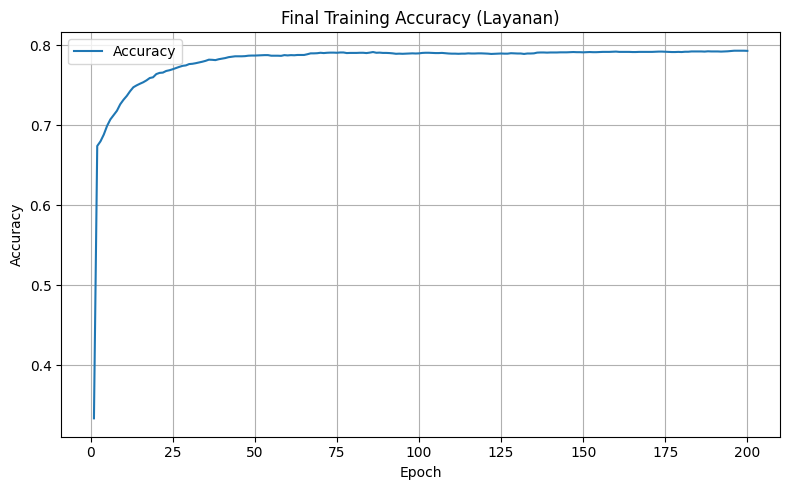

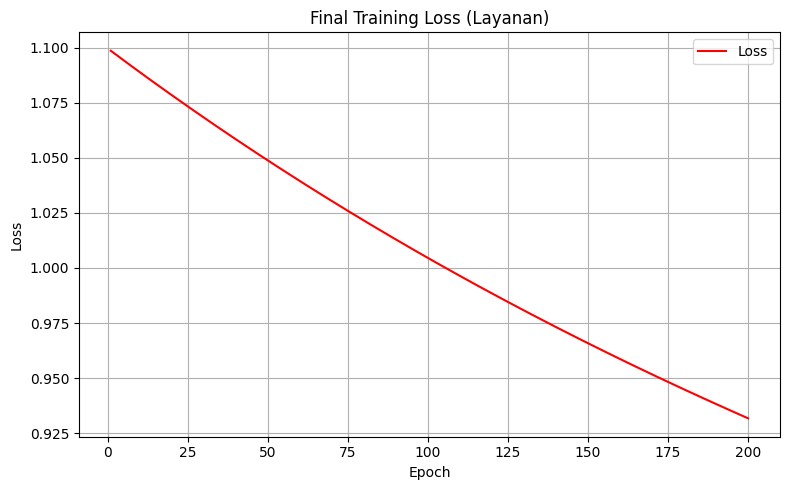


--- 10. Evaluasi Model Final PADA DATA TEST untuk Aspek: Layanan ---
Metrik pada Test Set:
  Accuracy: 0.6917
  Precision: 0.8041
  Recall: 0.6917
  F1: 0.7167
  MAE: 0.3217
  RMSE: 0.5902
  R2: -0.4484

Classification Report (DATA TEST) untuk Layanan:
              precision    recall  f1-score   support

Kelas 0 (-1)       0.40      0.81      0.54        89
 Kelas 1 (0)       0.93      0.66      0.77       454
 Kelas 2 (1)       0.44      0.75      0.55        57

    accuracy                           0.69       600
   macro avg       0.59      0.74      0.62       600
weighted avg       0.80      0.69      0.72       600


--- 12. Simpan Parameter Model untuk Aspek: Layanan ---
Weights & Bias untuk model aspek 'Layanan' disimpan.


==================== Memproses Aspek: Fitur ====================

--- 6. Persiapan Label Aspek 'Fitur' ---
Data training valid untuk aspek 'Fitur': 2400
Data test valid untuk aspek 'Fitur': 600
Label untuk aspek 'Fitur' berhasil di-encode.

--- 7. Hyper

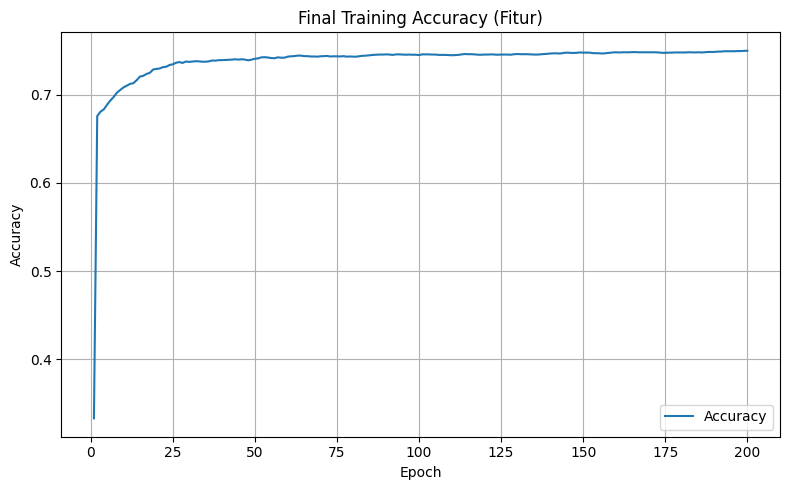

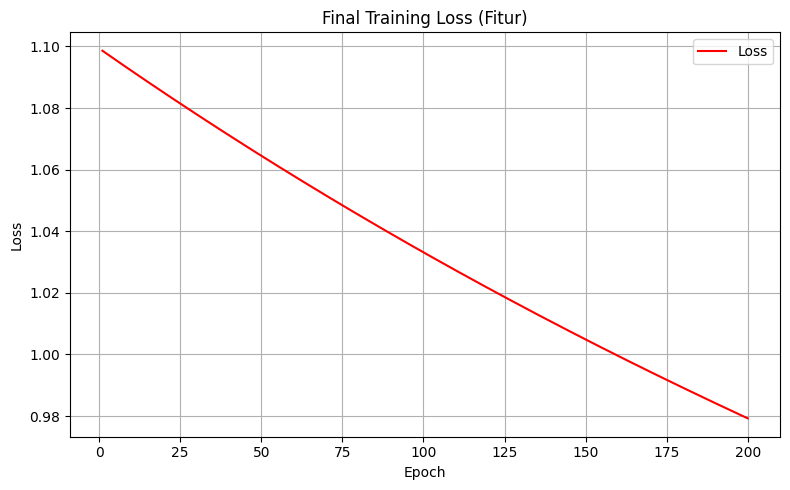


--- 10. Evaluasi Model Final PADA DATA TEST untuk Aspek: Fitur ---
Metrik pada Test Set:
  Accuracy: 0.6933
  Precision: 0.7743
  Recall: 0.6933
  F1: 0.7128
  MAE: 0.3233
  RMSE: 0.5972
  R2: -0.3463

Classification Report (DATA TEST) untuk Fitur:
              precision    recall  f1-score   support

Kelas 0 (-1)       0.44      0.81      0.57        98
 Kelas 1 (0)       0.90      0.68      0.77       439
 Kelas 2 (1)       0.43      0.60      0.50        63

    accuracy                           0.69       600
   macro avg       0.59      0.70      0.62       600
weighted avg       0.77      0.69      0.71       600


--- 12. Simpan Parameter Model untuk Aspek: Fitur ---
Weights & Bias untuk model aspek 'Fitur' disimpan.


==================== Memproses Aspek: Kebermanfaatan ====================

--- 6. Persiapan Label Aspek 'Kebermanfaatan' ---
Data training valid untuk aspek 'Kebermanfaatan': 2400
Data test valid untuk aspek 'Kebermanfaatan': 600
Label untuk aspek 'Kebermanfaat

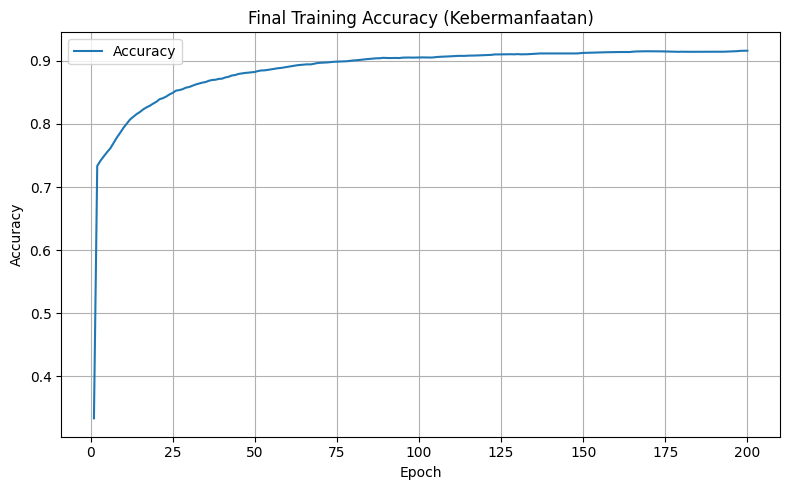

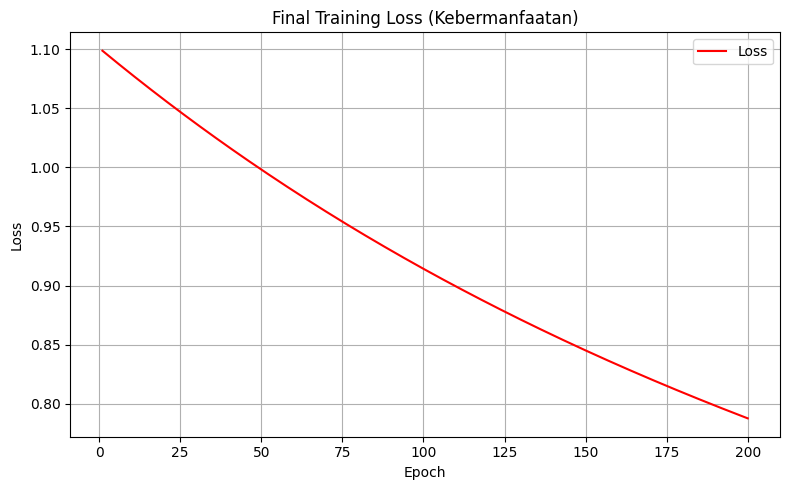


--- 10. Evaluasi Model Final PADA DATA TEST untuk Aspek: Kebermanfaatan ---
Metrik pada Test Set:
  Accuracy: 0.8417
  Precision: 0.9113
  Recall: 0.8417
  F1: 0.8713
  MAE: 0.1633
  RMSE: 0.4163
  R2: -0.0335

Classification Report (DATA TEST) untuk Kebermanfaatan:
              precision    recall  f1-score   support

Kelas 0 (-1)       0.06      0.43      0.11         7
 Kelas 1 (0)       0.96      0.84      0.90       481
 Kelas 2 (1)       0.76      0.86      0.80       112

    accuracy                           0.84       600
   macro avg       0.59      0.71      0.60       600
weighted avg       0.91      0.84      0.87       600


--- 12. Simpan Parameter Model untuk Aspek: Kebermanfaatan ---
Weights & Bias untuk model aspek 'Kebermanfaatan' disimpan.


==================== Memproses Aspek: Bisnis ====================

--- 6. Persiapan Label Aspek 'Bisnis' ---
Data training valid untuk aspek 'Bisnis': 2400
Data test valid untuk aspek 'Bisnis': 600
Label untuk aspek 'Bisnis' 

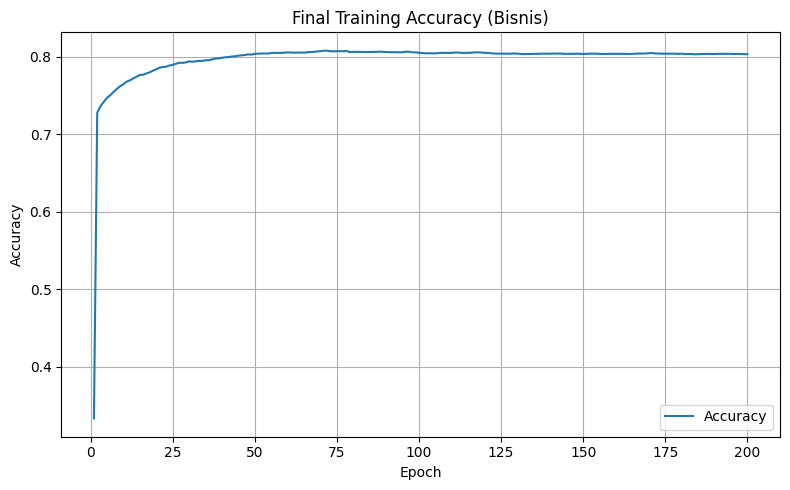

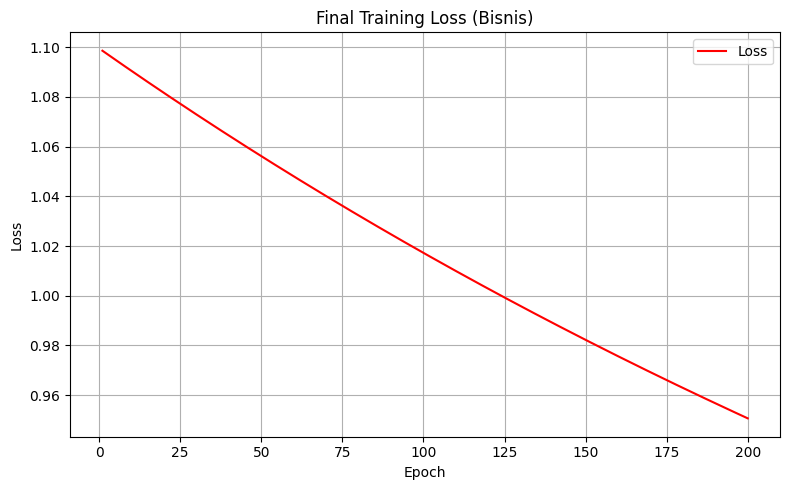


--- 10. Evaluasi Model Final PADA DATA TEST untuk Aspek: Bisnis ---
Metrik pada Test Set:
  Accuracy: 0.7150
  Precision: 0.7625
  Recall: 0.7150
  F1: 0.7257
  MAE: 0.3100
  RMSE: 0.6000
  R2: -0.0651

Classification Report (DATA TEST) untuk Bisnis:
              precision    recall  f1-score   support

Kelas 0 (-1)       0.51      0.80      0.63       107
 Kelas 1 (0)       0.88      0.70      0.78       397
 Kelas 2 (1)       0.55      0.67      0.60        96

    accuracy                           0.71       600
   macro avg       0.65      0.72      0.67       600
weighted avg       0.76      0.71      0.73       600


--- 12. Simpan Parameter Model untuk Aspek: Bisnis ---
Weights & Bias untuk model aspek 'Bisnis' disimpan.


==================== Memproses Aspek: Non Aspek ====================

--- 6. Persiapan Label Aspek 'Non Aspek' ---
Data training valid untuk aspek 'Non Aspek': 2400
Data test valid untuk aspek 'Non Aspek': 600
Label untuk aspek 'Non Aspek' berhasil di-encod

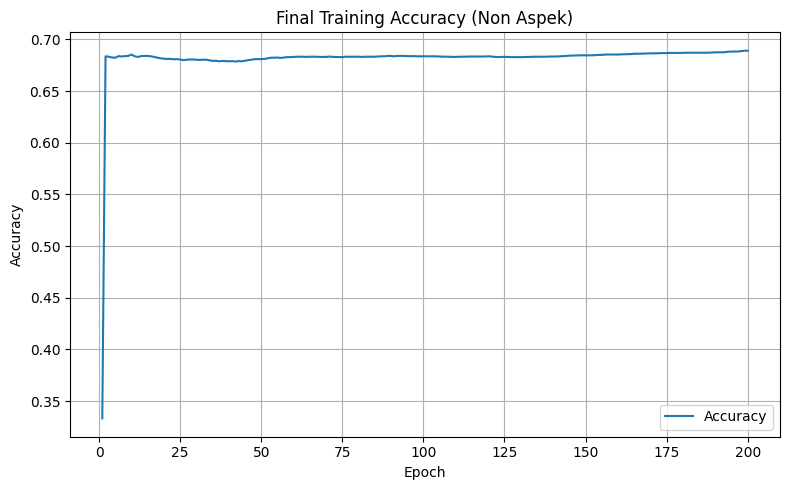

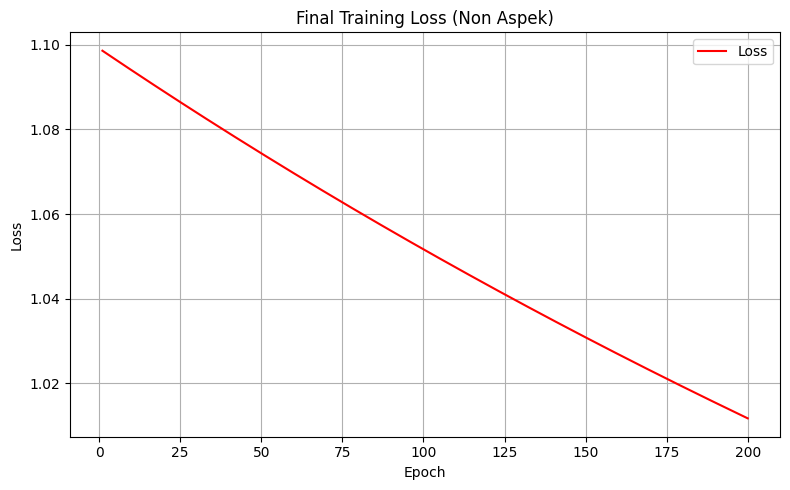


--- 10. Evaluasi Model Final PADA DATA TEST untuk Aspek: Non Aspek ---
Metrik pada Test Set:
  Accuracy: 0.5317
  Precision: 0.7047
  Recall: 0.5317
  F1: 0.5534
  MAE: 0.5083
  RMSE: 0.7670
  R2: -0.9892

Classification Report (DATA TEST) untuk Non Aspek:
              precision    recall  f1-score   support

Kelas 0 (-1)       0.37      0.91      0.53        98
 Kelas 1 (0)       0.87      0.46      0.60       422
 Kelas 2 (1)       0.26      0.44      0.32        80

    accuracy                           0.53       600
   macro avg       0.50      0.60      0.49       600
weighted avg       0.70      0.53      0.55       600


--- 12. Simpan Parameter Model untuk Aspek: Non Aspek ---
Weights & Bias untuk model aspek 'Non Aspek' disimpan.


In [136]:
for target_aspek in aspect_list:
    print(f"\n\n{'='*20} Memproses Aspek: {target_aspek} {'='*20}")

    # Persiapan Label Aspek untuk Train dan Test
    print(f"\n--- 6. Persiapan Label Aspek '{target_aspek}' ---")
    y_original_aspect_train = df_train[target_aspek].values
    y_original_aspect_test = df_test[target_aspek].values

    train_valid_indices = ~pd.isna(y_original_aspect_train)
    current_X_train_aspect_tfidf = X_train_tfidf_global[train_valid_indices]
    current_y_train_aspect_original = y_original_aspect_train[train_valid_indices]

    test_valid_indices = ~pd.isna(y_original_aspect_test)
    current_X_test_aspect_tfidf = X_test_tfidf_global[test_valid_indices]
    current_y_test_aspect_original = y_original_aspect_test[test_valid_indices]

    print(f"Data training valid untuk aspek '{target_aspek}': {len(current_y_train_aspect_original)}")
    print(f"Data test valid untuk aspek '{target_aspek}': {len(current_y_test_aspect_original)}")

    if len(current_y_train_aspect_original) < MAIN_CV_FOLDS or \
        len(current_y_train_aspect_original) < GRID_SEARCH_CV_FOLDS :
        print(f"Tidak cukup data training untuk aspek '{target_aspek}' setelah filter NaN untuk dilakukan CV. Melewati aspek ini.")
        continue
    
    label_mapping = {-1: 0, 0: 1, 1: 2}
    try:
        current_y_train_aspect_encoded = np.array([label_mapping[label] for label in current_y_train_aspect_original])
        if len(current_y_test_aspect_original) > 0:
            current_y_test_aspect_encoded = np.array([label_mapping[label] for label in current_y_test_aspect_original])
        else:
            current_y_test_aspect_encoded = np.array([]) # Test set bisa jadi kosong setelah filter NaN
    except KeyError as e:
        print(f"Error encoding label untuk {target_aspek}: Label {e} tidak ada dalam mapping. Melewati.")
        continue
    n_classes = 3
    print(f"Label untuk aspek '{target_aspek}' berhasil di-encode.")

    # Hyperparameter Tuning (HANYA pada Data Training)
    print(f"\n--- 7. Hyperparameter Tuning untuk Aspek: {target_aspek} ---")
    best_params, _, gs_results_df = manual_grid_search_cv(
        current_X_train_aspect_tfidf, current_y_train_aspect_encoded, param_grid, n_classes, GRID_SEARCH_CV_FOLDS, target_aspek
    )
    best_lr = best_params.get('lr', param_grid['lr'][0])
    best_epochs = best_params.get('epochs', param_grid['epochs'][0])
    best_lambda_reg = best_params.get('lambda_reg', param_grid['lambda_reg'][0])

    gs_filename = f'model/gs_results_{target_aspek.lower().replace(" ", "_")}.csv'
    gs_results_df.to_csv(gs_filename, index=False)
    print(f"Hasil Grid Search untuk aspek '{target_aspek}' disimpan ke {gs_filename}")

    # 8. Cross Validation (HANYA pada Data Training)
    print(f"\n--- 8. Cross Validation ({MAIN_CV_FOLDS}-fold) untuk Aspek: {target_aspek} ---")
    folds_df = cross_validate_manual_detail(
        current_X_train_aspect_tfidf, current_y_train_aspect_encoded, n_classes, MAIN_CV_FOLDS, 
        best_lr, best_epochs, best_lambda_reg, target_aspek
    )
    if folds_df.empty:
        print(f"Peringatan: Tidak ada hasil CV yang valid untuk aspek {target_aspek}. Melewati final training & evaluasi test.")
        continue

    print(f"\nHasil Cross Validation per Fold ({target_aspek}):\n{folds_df}")
    cv_filename = f'model/cv_result_{target_aspek.lower().replace(" ", "_")}.csv'
    folds_df.to_csv(cv_filename, index=True)
    print(f"Hasil CV untuk aspek '{target_aspek}' disimpan ke {cv_filename}")
    avg_metrics_cv = folds_df.mean()
    print(f"\nRata-rata Metrik CV ({target_aspek}):\n{avg_metrics_cv}")
    all_aspect_avg_metrics_cv[target_aspek] = avg_metrics_cv 

    # Final Training (HANYA pada Data Training, setelah SMOTE pada keseluruhan data training)
    print(f"\n--- 9. Final Training untuk Aspek: {target_aspek} ---")
    X_train_final_smoted, y_train_final_smoted = apply_smote_general( # <<-- GANTI NAMA FUNGSI
        current_X_train_aspect_tfidf, 
        current_y_train_aspect_encoded,
        f"Final Training Aspek {target_aspek} (General SMOTE)"  # <<-- Update context jika mau
    )
    
    if len(np.unique(y_train_final_smoted)) < 2 or X_train_final_smoted.shape[0] < n_classes:
        print(f"Peringatan: Data training untuk final training aspek {target_aspek} setelah SMOTE tidak memiliki cukup kelas/data. Melewati final training.")
        continue

    weights_final, bias_final, history_final = train_softmax_logreg(
        X_train_final_smoted, y_train_final_smoted, best_lr, best_epochs, n_classes, best_lambda_reg,
        print_every=FINAL_TRAIN_PRINT_EVERY, context=f"Final Training Aspek {target_aspek}"
    )
    history_df_final = pd.DataFrame(history_final, columns=["Epoch", "Accuracy", "Loss"])
    # ... (Penyimpanan history, plot model final)
    if not history_df_final.empty:
        best_idx_final = history_df_final['Accuracy'].idxmax()
        best_epoch_final_row = history_df_final.loc[best_idx_final]
        print(f"Best Epoch (Final Training {target_aspek}): {int(best_epoch_final_row['Epoch'])} (Accuracy: {best_epoch_final_row['Accuracy']:.4f}, Loss: {best_epoch_final_row['Loss']:.4f})")
    history_filename = f'model/history_{target_aspek.lower().replace(" ", "_")}.csv'
    history_df_final.to_csv(history_filename, index=False)
    print(f"History disimpan ke {history_filename}")
    
    # Visualisasi
    plt.figure(figsize=(8, 5))
    plt.plot(history_df_final['Epoch'], history_df_final['Accuracy'], label='Accuracy')
    plt.title(f'Final Training Accuracy ({target_aspek})')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True); plt.tight_layout()
    plt.savefig(f'model/plot_accuracy_{target_aspek.lower().replace(" ", "_")}.png'); plt.show(); plt.close()

    plt.figure(figsize=(8, 5))
    plt.plot(history_df_final['Epoch'], history_df_final['Loss'], label='Loss', color='red')
    plt.title(f'Final Training Loss ({target_aspek})')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True); plt.tight_layout()
    plt.savefig(f'model/plot_loss_{target_aspek.lower().replace(" ", "_")}.png'); plt.show(); plt.close()


    # Evaluasi Model Final PADA DATA TEST
    print(f"\n--- 10. Evaluasi Model Final PADA DATA TEST untuk Aspek: {target_aspek} ---")
    if len(current_y_test_aspect_encoded) > 0 and current_X_test_aspect_tfidf.shape[0] > 0 : # Pastikan ada data test
        y_pred_test = predict_softmax(current_X_test_aspect_tfidf, weights_final, bias_final)
        test_metrics_values = evaluate_metrics(current_y_test_aspect_encoded, y_pred_test, n_classes=n_classes)
        
        metric_names_eval = ['Accuracy', 'Precision', 'Recall', 'F1', 'MAE', 'RMSE', 'R2']
        test_metrics_dict = {}
        print("Metrik pada Test Set:")
        for name, value in zip(metric_names_eval, test_metrics_values):
            print(f"  {name}: {value:.4f}")
            test_metrics_dict[name] = value
        all_aspect_test_metrics[target_aspek] = pd.Series(test_metrics_dict)

        print(f"\nClassification Report (DATA TEST) untuk {target_aspek}:")
        target_names_report = [f"Kelas {i} ({key})" for key, i in label_mapping.items()] 
        try:
            print(classification_report(current_y_test_aspect_encoded, y_pred_test, target_names=target_names_report, zero_division=0, labels=np.arange(n_classes)))
        except Exception as e_report: # Lebih umum exceptionnya
            print(f"Tidak bisa membuat classification report untuk test set: {e_report}")
    else:
        print("Tidak ada data test yang valid untuk dievaluasi pada aspek ini.")

    # 12. Simpan Parameter Model Final
    print(f"\n--- 12. Simpan Parameter Model untuk Aspek: {target_aspek} ---")
    model_path = f'model/model_{target_aspek.lower().replace(" ", "_")}'
    np.save(f'{model_path}_weights.npy', weights_final)
    np.save(f'{model_path}_bias.npy', bias_final)
    print(f"Weights & Bias untuk model aspek '{target_aspek}' disimpan.")

#### Ringkasan Akhir

In [137]:
print("\n\n=== 13. Ringkasan Hasil Akhir ===")
print("\n================== Ringkasan Rata-rata Metrik CV (dari Data Training) ==================")
if all_aspect_avg_metrics_cv:
    summary_cv_df = pd.DataFrame(all_aspect_avg_metrics_cv).T
    print(summary_cv_df)
    summary_cv_filename = 'model/summary_avg_cv_metrics_all_aspects.csv'
    summary_cv_df.to_csv(summary_cv_filename, index=True)
    print(f"\nRingkasan rata-rata metrik CV disimpan ke {summary_cv_filename}")
else:
    print("Tidak ada hasil CV untuk dirangkum.")

print("\n\n================== Ringkasan Metrik pada TEST SET ==================")
if all_aspect_test_metrics:
    summary_test_df = pd.DataFrame(all_aspect_test_metrics).T
    print(summary_test_df)
    summary_test_filename = 'model/summary_test_set_metrics_all_aspects.csv'
    summary_test_df.to_csv(summary_test_filename, index=True)
    print(f"\nRingkasan metrik pada test set disimpan ke {summary_test_filename}")
else:
    print("Tidak ada hasil pada test set untuk dirangkum.")

print("\nProses Selesai.")



=== 13. Ringkasan Hasil Akhir ===

================== Ringkasan Rata-rata Metrik CV (dari Data Training) ==================
                Accuracy  Precision    Recall        F1       MAE      RMSE  \
Layanan         0.686667   0.785379  0.686667  0.711317  0.328333  0.598207   
Fitur           0.628750   0.723662  0.628750  0.650933  0.403750  0.684009   
Kebermanfaatan  0.835000   0.893243  0.835000  0.859604  0.166667  0.410697   
Bisnis          0.701667   0.754358  0.701667  0.714190  0.326667  0.618641   
Non Aspek       0.499583   0.700993  0.499583  0.528121  0.543750  0.793198   

                      R2  
Layanan        -0.513571  
Fitur          -0.596290  
Kebermanfaatan -0.025963  
Bisnis         -0.116746  
Non Aspek      -1.243848  

Ringkasan rata-rata metrik CV disimpan ke model/summary_avg_cv_metrics_all_aspects.csv


================== Ringkasan Metrik pada TEST SET ==================
                Accuracy  Precision    Recall        F1       MAE      RMSE  \

### Perbandingan Mode Sentimen dengan Tanpa Hyper Parameter Tuning

#### Pemodelan Prediksi Aspek tanpa Hyper Parameter Tuning

In [ ]:
print("\n\n" + "="*60)
print("=== A_DEFAULT. MEMULAI PELATIHAN MODEL DETEKSI ASPEK TANPA TUNING (DEFAULT PARAMS) ===")
print("="*60)

aspect_detection_binary_models_default = {}
all_aspect_detection_binary_test_metrics_default = {} 

DEFAULT_LR = 0.01      
DEFAULT_EPOCHS = 150     
DEFAULT_LAMBDA_REG = 0.01 
N_CLASSES_BINARY_DET_DEFAULT = 2 

if 'ASPEK_UNTUK_DETEKSI_BINER' not in locals() or not ASPEK_UNTUK_DETEKSI_BINER:
    ASPEK_UNTUK_DETEKSI_BINER = [asp for asp in aspect_list if asp != 'Non Aspek'] 
    print(f"Peringatan: 'ASPEK_UNTUK_DETEKSI_BINER' di-fallback ke: {ASPEK_UNTUK_DETEKSI_BINER}")


for target_aspek_deteksi_def in ASPEK_UNTUK_DETEKSI_BINER:
    print(f"\n\n{'='*30} Memproses Deteksi Biner (Default Params) untuk Aspek: {target_aspek_deteksi_def} {'='*30}")

    print(f"\n--- Persiapan Label Biner (Default) untuk Aspek '{target_aspek_deteksi_def}' ---")
    y_train_binary_current_aspect_def = df_train[target_aspek_deteksi_def].apply(lambda x: 1 if pd.notna(x) and x != 0 else 0).values
    y_test_binary_current_aspect_def = df_test[target_aspek_deteksi_def].apply(lambda x: 1 if pd.notna(x) and x != 0 else 0).values

    X_train_tfidf_current_aspect_det_def = X_train_tfidf_global
    X_test_tfidf_current_aspect_det_def = X_test_tfidf_global

    print(f"  Data training (Deteksi Biner Default {target_aspek_deteksi_def}): {len(y_train_binary_current_aspect_def)}")
    print(f"  Distribusi label biner di training: {dict(zip(*np.unique(y_train_binary_current_aspect_def, return_counts=True)))}")

    unique_labels_train_def, counts_labels_train_def = np.unique(y_train_binary_current_aspect_def, return_counts=True)
    min_samples_binary_def = counts_labels_train_def.min() if len(counts_labels_train_def) == N_CLASSES_BINARY_DET_DEFAULT else 0

    if len(y_train_binary_current_aspect_def) < N_CLASSES_BINARY_DET_DEFAULT or min_samples_binary_def < 2 : 
        print(f"  Tidak cukup data/variasi label untuk Deteksi Biner Aspek '{target_aspek_deteksi_def}' (Default). Melewati.")
        all_aspect_detection_binary_test_metrics_default[target_aspek_deteksi_def] = pd.Series(dtype='float64')
        continue
    
    print(f"\n--- Final Training (Deteksi Biner Default Params) untuk Aspek: {target_aspek_deteksi_def} ---")
    X_train_final_smoted_det_aspect_def, y_train_final_smoted_det_aspect_def = apply_smote_general(
        X_train_tfidf_current_aspect_det_def, 
        y_train_binary_current_aspect_def,
        f"Final Training Deteksi Biner (Default) {target_aspek_deteksi_def}"
    )
    
    if len(np.unique(y_train_final_smoted_det_aspect_def)) < N_CLASSES_BINARY_DET_DEFAULT or \
       y_train_final_smoted_det_aspect_def.shape[0] < N_CLASSES_BINARY_DET_DEFAULT :
        print(f"  Data setelah SMOTE tidak valid untuk Deteksi Biner (Default) {target_aspek_deteksi_def}. Melewati.")
        all_aspect_detection_binary_test_metrics_default[target_aspek_deteksi_def] = pd.Series(dtype='float64')
        continue
    
    weights_final_det_aspect_def, bias_final_det_aspect_def, _ = train_softmax_logreg(
        X_train_final_smoted_det_aspect_def, y_train_final_smoted_det_aspect_def, 
        DEFAULT_LR, int(DEFAULT_EPOCHS), 
        N_CLASSES_BINARY_DET_DEFAULT,
        DEFAULT_LAMBDA_REG,
        print_every=(int(DEFAULT_EPOCHS) + 1) if int(DEFAULT_EPOCHS) > 0 else 10, 
        context=f"Final Training Deteksi Biner (Default) {target_aspek_deteksi_def}"
    )
    aspect_detection_binary_models_default[target_aspek_deteksi_def] = {
        'weights': weights_final_det_aspect_def, 
        'bias': bias_final_det_aspect_def
    }
    print(f"  Model Deteksi Biner (Default) untuk aspek '{target_aspek_deteksi_def}' berhasil dilatih.")

    print(f"\n--- Evaluasi Model Deteksi Biner (Default) Aspek '{target_aspek_deteksi_def}' pada DATA TEST ---")
    if aspect_detection_binary_models_default.get(target_aspek_deteksi_def) and \
       len(y_test_binary_current_aspect_def) > 0 and X_test_tfidf_current_aspect_det_def.shape[0] > 0 and \
       X_test_tfidf_current_aspect_det_def.shape[0] == len(y_test_binary_current_aspect_def):

        y_pred_test_det_aspect_def = predict_softmax(
            X_test_tfidf_current_aspect_det_def, 
            weights_final_det_aspect_def, 
            bias_final_det_aspect_def
        )
        
        if len(y_pred_test_det_aspect_def) == len(y_test_binary_current_aspect_def):
            metrics_det_test_values_def = evaluate_metrics(y_test_binary_current_aspect_def, y_pred_test_det_aspect_def, N_CLASSES_BINARY_DET_DEFAULT)
            metric_names_det_eval_all_def = ['Accuracy', 'Precision', 'Recall', 'F1', 'MAE', 'RMSE', 'R2'] 
            test_metrics_dict_det_def = dict(zip(metric_names_det_eval_all_def, metrics_det_test_values_def))
            
            print(f"  Metrik pada Test Set (Deteksi Biner Default - {target_aspek_deteksi_def}):")
            for name, value in test_metrics_dict_det_def.items():
                if isinstance(value, (int, float)) and not np.isnan(value): 
                    print(f"    {name}: {value:.4f}")
                else: 
                    print(f"    {name}: {value}")
            all_aspect_detection_binary_test_metrics_default[target_aspek_deteksi_def] = pd.Series(test_metrics_dict_det_def)

            print(f"\n  Classification Report (DATA TEST) untuk Deteksi Biner (Default) {target_aspek_deteksi_def}:")
            # Pastikan classification_report sudah diimpor sebagai 'classification_report'
            print(classification_report(y_test_binary_current_aspect_def, y_pred_test_det_aspect_def, target_names=[f'Tidak {target_aspek_deteksi_def}', target_aspek_deteksi_def], zero_division=0))
    else:
        print(f"  Model deteksi biner (Default) {target_aspek_deteksi_def} tidak dilatih/data test tidak valid.")
        nan_metrics_for_default = {name: np.nan for name in ['Accuracy', 'Precision', 'Recall', 'F1', 'MAE', 'RMSE', 'R2']}
        all_aspect_detection_binary_test_metrics_default[target_aspek_deteksi_def] = pd.Series(nan_metrics_for_default)

    print(f"\n--- Simpan Parameter Model Deteksi Biner (Default) untuk Aspek: {target_aspek_deteksi_def} ---")
    if aspect_detection_binary_models_default.get(target_aspek_deteksi_def):
        model_det_aspect_def_path = f'model/model_detection_binary_default_{target_aspek_deteksi_def.lower().replace(" ", "_")}'
        try:
            np.save(f'{model_det_aspect_def_path}_weights.npy', aspect_detection_binary_models_default[target_aspek_deteksi_def]['weights'])
            np.save(f'{model_det_aspect_def_path}_bias.npy', aspect_detection_binary_models_default[target_aspek_deteksi_def]['bias'])
            print(f"  Weights & Bias (Default) untuk deteksi biner aspek '{target_aspek_deteksi_def}' disimpan.")
        except Exception as e: 
            print(f"  Gagal menyimpan parameter model deteksi biner (Default): {e}")
    else:
        print(f"  Model deteksi biner (Default) untuk aspek '{target_aspek_deteksi_def}' tidak dilatih, parameter tidak disimpan.")

print("\n\n" + "="*60)
print("=== SELESAI PELATIHAN MODEL DETEKSI ASPEK TANPA TUNING (DEFAULT PARAMS) ===")
print("="*60)



=== A_DEFAULT. MEMULAI PELATIHAN MODEL DETEKSI ASPEK TANPA TUNING (DEFAULT PARAMS) ===


============================== Memproses Deteksi Biner (Default Params) untuk Aspek: Layanan ==============================

--- Persiapan Label Biner (Default) untuk Aspek 'Layanan' ---
  Data training (Deteksi Biner Default Layanan): 2400
  Distribusi label biner di training: {np.int64(0): np.int64(1815), np.int64(1): np.int64(585)}

--- Final Training (Deteksi Biner Default Params) untuk Aspek: Layanan ---
  Penerapan SMOTE General untuk Final Training Deteksi Biner (Default) Layanan:
    Distribusi Label Sebelum SMOTE: {0: 1815, 1: 585}
    Menerapkan SMOTE dengan k_neighbors=5...
    SMOTE berhasil diterapkan.
    Distribusi Label Akhir Setelah Potensi SMOTE: {0: 1815, 1: 1815}
    Total data setelah potensi SMOTE: 3630
  Model Deteksi Biner (Default) untuk aspek 'Layanan' berhasil dilatih.

--- Evaluasi Model Deteksi Biner (Default) Aspek 'Layanan' pada DATA TEST ---
  Metrik pada Test Set 

#### Pemodelan Sentimen Tiap Aspek tanpa Hyper Parameter Tuning

In [ ]:
print(f"\n\n{'='*60}\n=== MENJALANKAN ULANG PROSES DENGAN PARAMETER DEFAULT (TANPA TUNING) ===\n{'='*60}")

# Tentukan parameter default yang akan digunakan untuk skenario ini
DEFAULT_LR = 0.01      
DEFAULT_EPOCHS = 150     
DEFAULT_LAMBDA_REG = 0.01 
print(f"Parameter Default yang akan digunakan: lr={DEFAULT_LR}, epochs={int(DEFAULT_EPOCHS)}, lambda_reg={DEFAULT_LAMBDA_REG}") # Pastikan epochs int saat print

all_aspect_test_metrics_default = {}

for target_aspek in aspect_list:
    print(f"\n\n{'='*40}\n=== Memproses Aspek (Default Params): {target_aspek} ===\n{'='*40}")

    # Langkah 6: Persiapan Label Aspek & Encoding
    print(f"\n--- Persiapan Label Aspek '{target_aspek}' & Encoding (Default Scenario) ---")
    y_original_aspect_train_def = df_train[target_aspek].values
    y_original_aspect_test_def = df_test[target_aspek].values

    train_valid_indices_def = ~pd.isna(y_original_aspect_train_def)
    if np.sum(train_valid_indices_def) == 0:
        print(f"Peringatan: Tidak ada data training valid (non-NaN) untuk aspek '{target_aspek}' (Default). Melewati.")
        all_aspect_test_metrics_default[target_aspek] = pd.Series(dtype='float64')
        continue
    current_X_train_aspect_tfidf_def = X_train_tfidf_global[train_valid_indices_def]
    current_y_train_aspect_original_def = y_original_aspect_train_def[train_valid_indices_def]

    test_valid_indices_def = ~pd.isna(y_original_aspect_test_def)
    if np.sum(test_valid_indices_def) == 0:
        print(f"Peringatan: Tidak ada data test valid (non-NaN) untuk aspek '{target_aspek}' (Default).")
        current_X_test_aspect_tfidf_def = np.empty((0, X_train_tfidf_global.shape[1] if X_train_tfidf_global.shape[0] > 0 else 0))
        current_y_test_aspect_original_def = np.array([])
    else:
        current_X_test_aspect_tfidf_def = X_test_tfidf_global[test_valid_indices_def]
        current_y_test_aspect_original_def = y_original_aspect_test_def[test_valid_indices_def]

    print(f"Data training valid (Default) untuk aspek '{target_aspek}': {len(current_y_train_aspect_original_def)}")
    print(f"Data test valid (Default) untuk aspek '{target_aspek}': {len(current_y_test_aspect_original_def)}")

    if len(current_y_train_aspect_original_def) < n_classes : # n_classes harus sudah ada
        print(f"Tidak cukup data training ({len(current_y_train_aspect_original_def)}) < n_classes ({n_classes}) untuk aspek '{target_aspek}' (Default). Melewati.")
        all_aspect_test_metrics_default[target_aspek] = pd.Series(dtype='float64')
        continue
    
    try: # label_mapping harus sudah ada
        current_y_train_aspect_encoded_def = np.array([label_mapping[label] for label in current_y_train_aspect_original_def])
        if len(current_y_test_aspect_original_def) > 0:
            current_y_test_aspect_encoded_def = np.array([label_mapping[label] for label in current_y_test_aspect_original_def])
        else:
            current_y_test_aspect_encoded_def = np.array([])
    except KeyError as e:
        print(f"Error encoding label untuk {target_aspek} (Default): Label {e} tidak ada dalam mapping. Melewati.")
        all_aspect_test_metrics_default[target_aspek] = pd.Series(dtype='float64')
        continue
    print(f"Label untuk aspek '{target_aspek}' berhasil di-encode (Default).")


    # Langkah 9: Final Training (HANYA pada Data Training, setelah SMOTE, dengan Parameter Default)
    print(f"\n--- Final Training (Default Params) untuk Aspek: {target_aspek} ---")
    
    X_train_final_smoted_def, y_train_final_smoted_def = apply_smote_general( 
        current_X_train_aspect_tfidf_def, current_y_train_aspect_encoded_def,
        f"Final Training Aspek {target_aspek} (Default Params - General SMOTE)"
    )

    weights_final_default, bias_final_default = None, None
    if X_train_final_smoted_def.shape[0] == 0 or len(np.unique(y_train_final_smoted_def)) < 2 or X_train_final_smoted_def.shape[0] < n_classes:
        print(f"Peringatan: Data training (Default) untuk aspek {target_aspek} setelah SMOTE tidak valid. Model tidak dilatih.")
        all_aspect_test_metrics_default[target_aspek] = pd.Series(dtype='float64')
        continue
    
    weights_final_default, bias_final_default, _ = train_softmax_logreg(
        X_train_final_smoted_def, y_train_final_smoted_def,
        DEFAULT_LR, int(DEFAULT_EPOCHS), n_classes, DEFAULT_LAMBDA_REG, # Pastikan DEFAULT_EPOCHS int
        print_every=(int(DEFAULT_EPOCHS) + 1) if int(DEFAULT_EPOCHS) > 0 else 10, # Supress output, hindari print_every=0
        context=f"Final Training Aspek {target_aspek} (Default Params)"
    )
    print(f"  Model (Default Params) berhasil dilatih untuk aspek: {target_aspek}")


    # Langkah 10: Evaluasi Model Final PADA DATA TEST (Skenario Default)
    print(f"\n--- Evaluasi pada DATA TEST (Default Params) untuk Aspek: {target_aspek} ---")
    if weights_final_default is not None and bias_final_default is not None and \
        len(current_y_test_aspect_encoded_def) > 0 and \
        current_X_test_aspect_tfidf_def.shape[0] > 0 and \
        current_X_test_aspect_tfidf_def.shape[0] == len(current_y_test_aspect_encoded_def):

        y_pred_test_default = predict_softmax(current_X_test_aspect_tfidf_def, weights_final_default, bias_final_default)

        if len(y_pred_test_default) == len(current_y_test_aspect_encoded_def):
            test_metrics_values_default = evaluate_metrics(current_y_test_aspect_encoded_def, y_pred_test_default, n_classes)
            metric_names_eval = ['Accuracy', 'Precision', 'Recall', 'F1', 'MAE', 'RMSE', 'R2']
            test_metrics_dict_default = {}
            print("  Metrik pada Test Set (Default Params):")
            for name, value in zip(metric_names_eval, test_metrics_values_default):
                value_str = f"{value:.4f}" if pd.notna(value) else "NaN"
                print(f"    {name}: {value_str}")
                test_metrics_dict_default[name] = value
            all_aspect_test_metrics_default[target_aspek] = pd.Series(test_metrics_dict_default)
        else:
            print("  Peringatan: Jumlah prediksi tidak cocok dengan jumlah label test (Default). Evaluasi dibatalkan.")
            all_aspect_test_metrics_default[target_aspek] = pd.Series(dtype='float64')
            
    elif weights_final_default is None or bias_final_default is None:
        print(f"  Model (Default) untuk aspek {target_aspek} tidak dilatih, evaluasi tidak dapat dilakukan.")
        all_aspect_test_metrics_default[target_aspek] = pd.Series(dtype='float64')
    else:
        print(f"  Tidak ada data test yang valid atau X dan y test tidak cocok untuk evaluasi aspek {target_aspek} (Default).")
        all_aspect_test_metrics_default[target_aspek] = pd.Series(dtype='float64')

print("\n\n### Loop pemrosesan skenario TANPA TUNING (PARAMETER DEFAULT) selesai ###")



=== MENJALANKAN ULANG PROSES DENGAN PARAMETER DEFAULT (TANPA TUNING) ===
Parameter Default yang akan digunakan: lr=0.01, epochs=150, lambda_reg=0.01


=== Memproses Aspek (Default Params): Layanan ===

--- Persiapan Label Aspek 'Layanan' & Encoding (Default Scenario) ---
Data training valid (Default) untuk aspek 'Layanan': 2400
Data test valid (Default) untuk aspek 'Layanan': 600
Label untuk aspek 'Layanan' berhasil di-encode (Default).

--- Final Training (Default Params) untuk Aspek: Layanan ---
  Penerapan SMOTE General untuk Final Training Aspek Layanan (Default Params - General SMOTE):
    Distribusi Label Sebelum SMOTE: {0: 355, 1: 1815, 2: 230}
    Menerapkan SMOTE dengan k_neighbors=5...
    SMOTE berhasil diterapkan.
    Distribusi Label Akhir Setelah Potensi SMOTE: {0: 1815, 1: 1815, 2: 1815}
    Total data setelah potensi SMOTE: 5445
  Model (Default Params) berhasil dilatih untuk aspek: Layanan

--- Evaluasi pada DATA TEST (Default Params) untuk Aspek: Layanan ---
  Metri

#### Perbandingan Dengan dan Tanpa Hyper Parameter Tuning (Model Prediksi Aspek)

In [140]:
print("\n\n" + "="*60)
print("=== PERBANDINGAN HASIL PADA TEST SET MODEL DETEKSI ASPEK (TUNED vs DEFAULT) ===")
print("="*60)

# Pastikan dictionary hasil untuk model deteksi aspek ada
# Untuk model deteksi yang dituning
if 'all_aspect_detection_binary_test_metrics_softmax' not in locals() or \
   not isinstance(all_aspect_detection_binary_test_metrics_softmax, dict):
    print("KRITICAL: Variabel 'all_aspect_detection_binary_test_metrics_softmax' (hasil deteksi tuned) tidak ditemukan atau bukan dictionary.")
    all_aspect_detection_binary_test_metrics_softmax = {}

# Untuk model deteksi dengan parameter default
if 'all_aspect_detection_binary_test_metrics_default' not in locals() or \
   not isinstance(all_aspect_detection_binary_test_metrics_default, dict):
    print("KRITICAL: Variabel 'all_aspect_detection_binary_test_metrics_default' (hasil deteksi default) tidak ditemukan atau bukan dictionary.")
    all_aspect_detection_binary_test_metrics_default = {}

# Buat DataFrame dari hasil kedua skenario untuk deteksi aspek
df_detection_tuned_results = pd.DataFrame.from_dict(all_aspect_detection_binary_test_metrics_softmax, orient='index')
df_detection_default_results = pd.DataFrame.from_dict(all_aspect_detection_binary_test_metrics_default, orient='index')

# Daftar metrik yang ingin ditampilkan dalam perbandingan (untuk deteksi biner, fokus pada ini)
metrics_to_display_detection = ['Accuracy', 'Precision', 'Recall', 'F1'] 

# Buat tabel perbandingan yang lebih detail
comparison_rows_detection = []

# Gunakan ASPEK_UNTUK_DETEKSI_BINER sebagai daftar aspek yang relevan
# Pastikan variabel ini sudah didefinisikan sebelumnya
if 'ASPEK_UNTUK_DETEKSI_BINER' not in locals() or not isinstance(ASPEK_UNTUK_DETEKSI_BINER, list) or not ASPEK_UNTUK_DETEKSI_BINER:
    print("PERINGATAN: 'ASPEK_UNTUK_DETEKSI_BINER' tidak terdefinisi atau kosong. Tabel perbandingan deteksi mungkin tidak akurat atau kosong.")
    # Fallback: coba ambil dari index DataFrame jika ada
    relevant_detection_aspects = sorted(list(set(
        (df_detection_tuned_results.index.tolist() if not df_detection_tuned_results.empty else []) +
        (df_detection_default_results.index.tolist() if not df_detection_default_results.empty else [])
    )))
else:
    relevant_detection_aspects = ASPEK_UNTUK_DETEKSI_BINER


for aspek_det_comp in relevant_detection_aspects: 
    row_data_det = {'Aspek Deteksi': aspek_det_comp} # Nama kolom index
    for metric_det in metrics_to_display_detection:
        # Ambil nilai Tuned untuk deteksi
        val_tuned_det = df_detection_tuned_results.loc[aspek_det_comp, metric_det] if \
                        aspek_det_comp in df_detection_tuned_results.index and \
                        metric_det in df_detection_tuned_results.columns else np.nan
        
        # Ambil nilai Default untuk deteksi
        val_default_det = df_detection_default_results.loc[aspek_det_comp, metric_det] if \
                          aspek_det_comp in df_detection_default_results.index and \
                          metric_det in df_detection_default_results.columns else np.nan

        row_data_det[f'{metric_det} (Tuned)'] = val_tuned_det
        row_data_det[f'{metric_det} (Default)'] = val_default_det
            
    comparison_rows_detection.append(row_data_det)

if comparison_rows_detection:
    comparison_summary_df_detection = pd.DataFrame(comparison_rows_detection)
    if not comparison_summary_df_detection.empty:
        comparison_summary_df_detection.set_index('Aspek Deteksi', inplace=True) # Sesuaikan nama index

    # Fungsi format (bisa sama dengan yang untuk sentimen)
    def format_cell_value_det(val):
        if pd.isna(val):
            return "N/A"
        return f"{val:.4f}"

    # Buat DataFrame untuk display
    display_comparison_df_detection = comparison_summary_df_detection.copy()
    if not display_comparison_df_detection.empty:
        for col_det in display_comparison_df_detection.columns:
            display_comparison_df_detection[col_det] = display_comparison_df_detection[col_det].apply(format_cell_value_det)
    
    print("\nTabel Perbandingan Metrik Model Deteksi Aspek (Tuned vs Default) per Aspek Biner:")
    if not display_comparison_df_detection.empty:
        try:
            from IPython.display import display, HTML
            styles_det = [
                dict(selector="th", props=[("font-size", "105%"),
                                           ("text-align", "center"),
                                           ("font-weight", "bold"),
                                           ("padding", "5px")]),
                dict(selector="td", props=[("text-align", "right"),
                                           ("padding", "5px")])
            ]
            styled_df_det = display_comparison_df_detection.style.set_table_styles(styles_det)\
                                                 .set_caption("Perbandingan Hasil Model Deteksi Aspek (Tuned vs Default) pada Test Set")\
                                                 .format(na_rep='N/A')
            display(HTML(styled_df_det.to_html()))
        except ImportError:
            print(display_comparison_df_detection.to_string(na_rep='N/A'))
    else:
        print("DataFrame perbandingan deteksi aspek kosong setelah pemrosesan.")

    # Simpan tabel perbandingan ke file CSV
    if not comparison_summary_df_detection.empty:
        # Pastikan folder MODEL_DATA_FOLDER sudah ada (biasanya dari awal skrip)
        # os.makedirs(MODEL_DATA_FOLDER, exist_ok=True) 
        
        comparison_numeric_filename_det = os.path.join("model", 'summary_comparison_metrics_detection_numeric.csv')
        comparison_display_filename_det = os.path.join("model", 'summary_comparison_metrics_detection_display.csv')
        try:
            comparison_summary_df_detection.to_csv(comparison_numeric_filename_det, float_format='%.4f')
            display_comparison_df_detection.to_csv(comparison_display_filename_det)
            print(f"\nTabel perbandingan deteksi aspek (numerik) disimpan ke: {comparison_numeric_filename_det}")
            print(f"Tabel perbandingan deteksi aspek (tampilan) disimpan ke: {comparison_display_filename_det}")
        except Exception as e:
            print(f"Gagal menyimpan file CSV perbandingan deteksi aspek: {e}")
else:
    print("Tidak ada data perbandingan untuk model deteksi aspek yang bisa dibuat (mungkin `relevant_detection_aspects` kosong atau `comparison_rows_detection` tidak terisi).")

print("\n\n### Proses Pembuatan Tabel Perbandingan Model Deteksi Aspek Selesai ###")



=== PERBANDINGAN HASIL PADA TEST SET MODEL DETEKSI ASPEK (TUNED vs DEFAULT) ===

Tabel Perbandingan Metrik Model Deteksi Aspek (Tuned vs Default) per Aspek Biner:



Tabel perbandingan deteksi aspek (numerik) disimpan ke: model\summary_comparison_metrics_detection_numeric.csv
Tabel perbandingan deteksi aspek (tampilan) disimpan ke: model\summary_comparison_metrics_detection_display.csv


### Proses Pembuatan Tabel Perbandingan Model Deteksi Aspek Selesai ###


#### Perbandingan Dengan dan Tanpa Hyper Parameter Tuning (Model Sentimen)

In [141]:
print(f"\n\n{'='*60}\n=== PERBANDINGAN HASIL PADA TEST SET MODEL SENTIMEN (TUNED vs DEFAULT) ===\n{'='*60}")

# Pastikan dictionary hasil ada
if 'all_aspect_test_metrics' not in locals() or not isinstance(all_aspect_test_metrics, dict):
    print("KRITICAL: Variabel 'all_aspect_test_metrics' (hasil tuned) tidak ditemukan atau bukan dictionary.")
    all_aspect_test_metrics = {}
if 'all_aspect_test_metrics_default' not in locals() or not isinstance(all_aspect_test_metrics_default, dict):
    print("KRITICAL: Variabel 'all_aspect_test_metrics_default' (hasil default) tidak ditemukan atau bukan dictionary.")
    all_aspect_test_metrics_default = {}

# Buat DataFrame dari hasil kedua skenario
df_tuned_results = pd.DataFrame.from_dict(all_aspect_test_metrics, orient='index')
df_default_results = pd.DataFrame.from_dict(all_aspect_test_metrics_default, orient='index')

# Daftar metrik yang ingin ditampilkan dalam perbandingan
metrics_to_display = ['Accuracy', 'Precision', 'Recall', 'F1'] # Sesuaikan jika perlu

# Buat tabel perbandingan yang lebih detail
comparison_rows = []

# --- PERBAIKAN INISIALISASI PROCESSED ASPECTS ---
processed_aspects_tuned = []
processed_aspects_default = []

if not df_tuned_results.empty:
    processed_aspects_tuned = df_tuned_results.index.tolist()
# Selalu inisialisasi processed_aspects_default, bahkan jika df_tuned_results tidak kosong,
# karena kita perlu gabungan dari keduanya.
if not df_default_results.empty:
    processed_aspects_default = df_default_results.index.tolist()
# --- AKHIR PERBAIKAN INISIALISASI ---


# Gunakan gabungan aspek yang ada di kedua hasil, atau aspect_list jika didefinisikan
# Untuk robust, kita ambil union dari aspek yang ada di hasil
relevant_aspects = sorted(list(set(processed_aspects_tuned + processed_aspects_default)))

# Fallback ke aspect_list jika relevant_aspects kosong dan aspect_list ada
if not relevant_aspects and 'aspect_list' in locals() and isinstance(aspect_list, list) and aspect_list:
    print("INFO: Tidak ada aspek yang diproses di kedua skenario, menggunakan 'aspect_list' sebagai fallback.")
    relevant_aspects = aspect_list
elif not relevant_aspects:
    print("PERINGATAN: Tidak ada aspek yang relevan ditemukan dari hasil tuned/default, dan 'aspect_list' tidak tersedia/kosong. Tabel perbandingan mungkin kosong.")
    # Anda mungkin ingin keluar di sini jika tidak ada aspek sama sekali


for aspek in relevant_aspects: # Gunakan aspek yang relevan
    row_data = {'Aspek': aspek}
    for metric in metrics_to_display:
        # Ambil nilai Tuned
        val_tuned = df_tuned_results.loc[aspek, metric] if aspek in df_tuned_results.index and metric in df_tuned_results.columns else np.nan
        # Ambil nilai Default
        val_default = df_default_results.loc[aspek, metric] if aspek in df_default_results.index and metric in df_default_results.columns else np.nan

        row_data[f'{metric} (Tuned)'] = val_tuned
        row_data[f'{metric} (Default)'] = val_default
            
    comparison_rows.append(row_data)

if comparison_rows:
    comparison_summary_df = pd.DataFrame(comparison_rows)
    if not comparison_summary_df.empty:
        comparison_summary_df.set_index('Aspek', inplace=True)

    # Definisikan fungsi format_cell_value di sini jika belum
    def format_cell_value(val):
        if pd.isna(val):
            return "N/A"
        return f"{val:.4f}"

    # Buat DataFrame untuk display
    display_comparison_df = comparison_summary_df.copy()
    if not display_comparison_df.empty:
        for col in display_comparison_df.columns:
            display_comparison_df[col] = display_comparison_df[col].apply(format_cell_value)
    
    print("\nTabel Perbandingan Metrik (Tuned vs Default) per Aspek:")
    if not display_comparison_df.empty:
        try:
            from IPython.display import display, HTML
            styles = [
                dict(selector="th", props=[("font-size", "105%"),
                                           ("text-align", "center"),
                                           ("font-weight", "bold"),
                                           ("padding", "5px")]),
                dict(selector="td", props=[("text-align", "right"),
                                           ("padding", "5px")])
            ]
            styled_df = display_comparison_df.style.set_table_styles(styles)\
                                                 .set_caption("Perbandingan Hasil Tuned vs Default Parameters pada Test Set")\
                                                 .format(na_rep='N/A')
            display(HTML(styled_df.to_html()))
        except ImportError:
            print(display_comparison_df.to_string(na_rep='N/A'))
    else:
        print("DataFrame perbandingan kosong setelah pemrosesan.")

    if not comparison_summary_df.empty:
        folder_penyimpanan_summary = 'model'
        os.makedirs(folder_penyimpanan_summary, exist_ok=True)
        
        comparison_numeric_filename = os.path.join(folder_penyimpanan_summary, 'summary_comparison_metrics_numeric.csv')
        comparison_display_filename = os.path.join(folder_penyimpanan_summary, 'summary_comparison_metrics_display.csv')
        try:
            comparison_summary_df.to_csv(comparison_numeric_filename, float_format='%.4f')
            display_comparison_df.to_csv(comparison_display_filename)
            print(f"\nTabel perbandingan (numerik) disimpan ke: {comparison_numeric_filename}")
            print(f"Tabel perbandingan (tampilan) disimpan ke: {comparison_display_filename}")
        except Exception as e:
            print(f"Gagal menyimpan file CSV perbandingan: {e}")
else:
    print("Tidak ada data perbandingan yang bisa dibuat (kemungkinan `relevant_aspects` kosong atau `comparison_rows` tidak terisi).")

print("\n\n### Proses Pembuatan Tabel Perbandingan Selesai ###")



=== PERBANDINGAN HASIL PADA TEST SET MODEL SENTIMEN (TUNED vs DEFAULT) ===

Tabel Perbandingan Metrik (Tuned vs Default) per Aspek:



Tabel perbandingan (numerik) disimpan ke: model\summary_comparison_metrics_numeric.csv
Tabel perbandingan (tampilan) disimpan ke: model\summary_comparison_metrics_display.csv


### Proses Pembuatan Tabel Perbandingan Selesai ###


#### Visualisasi Perbandingan Evaluasi Model Prediksi Sentimen



=== D. VISUALISASI HEATMAP MODEL DETEKSI ASPEK (SEMUA METRIK) ===


--- Visualisasi Semua Metrik Model Deteksi Aspek (Parameter Default) ---
Heatmap 'Performa Model Deteksi Aspek (Default - Semua Metrik)' disimpan ke: model/visualisasi_heatmap_deteksi_aspek_lengkap\heatmap_detection_all_metrics_default.png


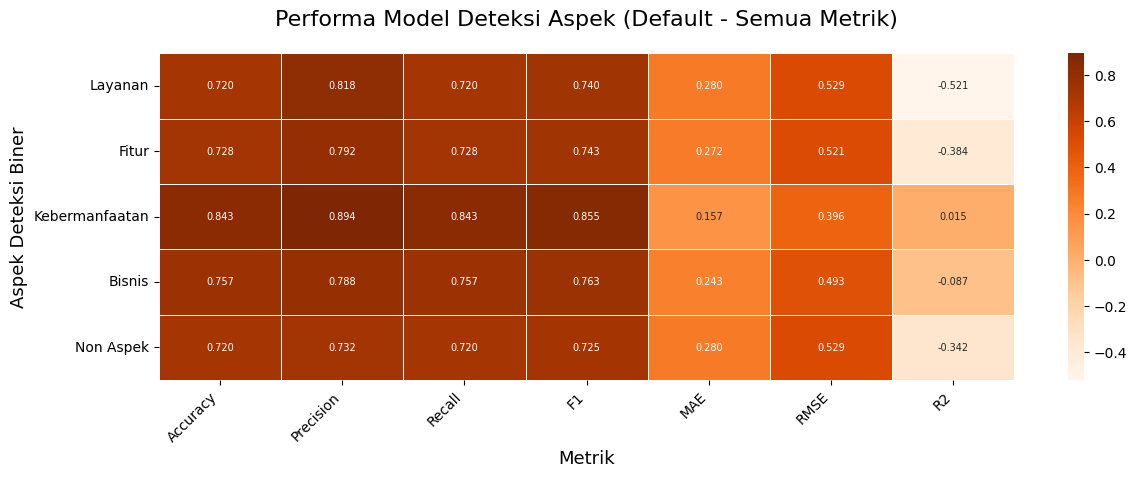



--- Visualisasi Semua Metrik Model Deteksi Aspek (Setelah Tuning) ---
Heatmap 'Performa Model Deteksi Aspek (Tuned - Semua Metrik)' disimpan ke: model/visualisasi_heatmap_deteksi_aspek_lengkap\heatmap_detection_all_metrics_tuned.png


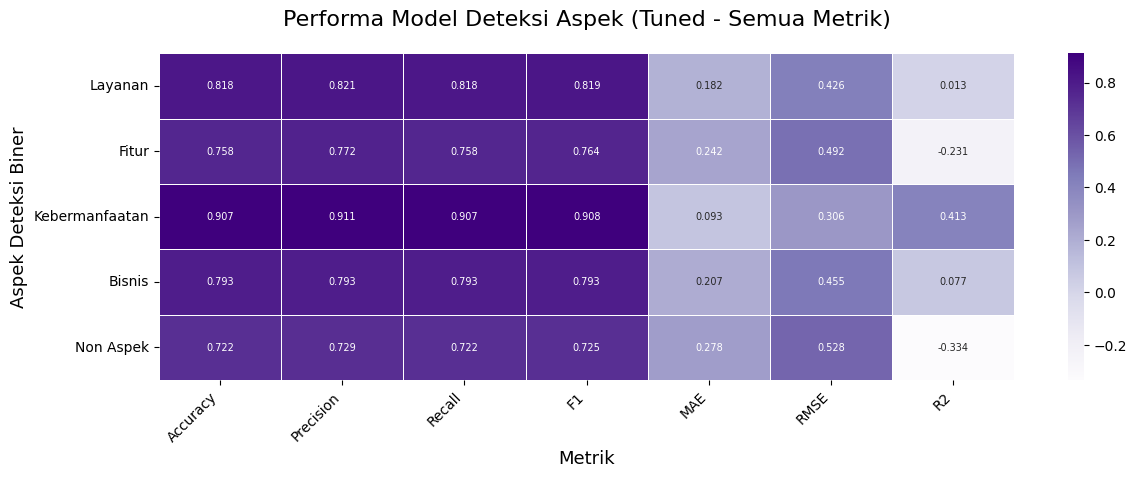



--- Visualisasi Perbandingan Semua Metrik Model Deteksi Aspek (Tuned - Default) ---
Heatmap 'Peningkatan Metrik Deteksi Aspek Setelah Tuning (Tuned - Default)' disimpan ke: model/visualisasi_heatmap_deteksi_aspek_lengkap\heatmap_detection_all_metrics_difference.png


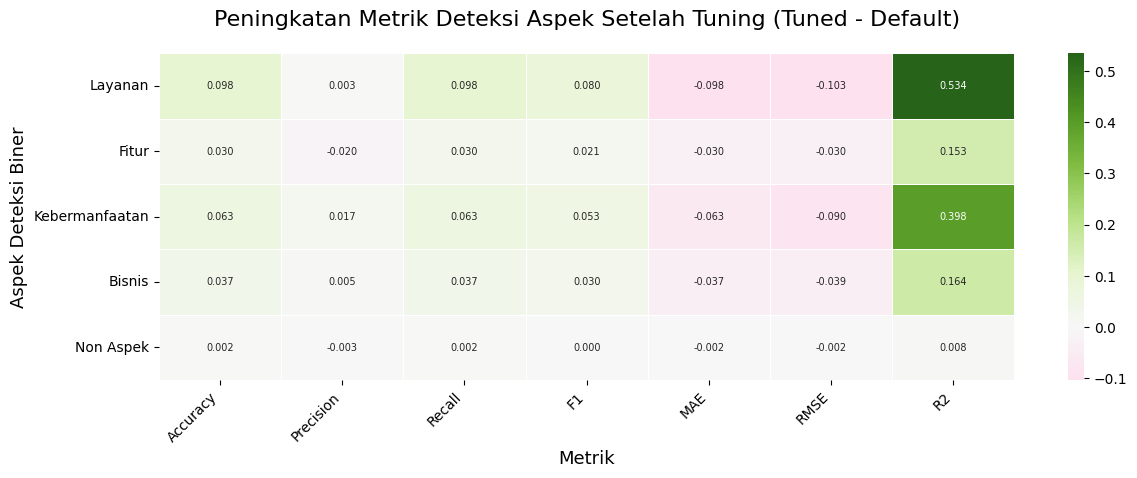



=== SELESAI VISUALISASI HEATMAP MODEL DETEKSI ASPEK (SEMUA METRIK) ===


In [142]:
print("\n\n" + "="*60)
print("=== D. VISUALISASI HEATMAP MODEL DETEKSI ASPEK (SEMUA METRIK) ===") # Judul disesuaikan
print("="*60)

output_folder_heatmap_detection = "model/visualisasi_heatmap_deteksi_aspek_lengkap" # Nama folder disesuaikan
os.makedirs(output_folder_heatmap_detection, exist_ok=True)

# --- Fungsi plot_semua_metrik_heatmap (ASUMSI SUDAH ADA DARI KODE ANDA SEBELUMNYA) ---
def plot_semua_metrik_heatmap(df_metrics_input, plot_title, output_filename,
                               vmin_val=None, vmax_val=None, center_val=None, cmap_color="viridis"):
    if not isinstance(df_metrics_input, pd.DataFrame) or df_metrics_input.empty:
        print(f"Input bukan DataFrame yang valid atau DataFrame kosong. Heatmap untuk '{plot_title}' tidak dibuat.")
        return

    df_to_plot = df_metrics_input.copy()
    for col in df_to_plot.columns:
        df_to_plot[col] = pd.to_numeric(df_to_plot[col], errors='coerce')
    
    df_to_plot.dropna(axis=0, how='all', inplace=True)
    df_to_plot.dropna(axis=1, how='all', inplace=True)

    if df_to_plot.empty:
        print(f"DataFrame menjadi kosong setelah membersihkan NaN. Heatmap untuk '{plot_title}' tidak dibuat.")
        return

    num_metrics = df_to_plot.shape[1]
    num_aspects = df_to_plot.shape[0]
    
    fig_width = max(8, num_metrics * 1.8 if num_metrics > 0 else 8)
    fig_height = max(5, num_aspects * 0.7 if num_aspects > 0 else 5)
    plt.figure(figsize=(fig_width, fig_height))

    sns.heatmap(df_to_plot, annot=True, fmt=".3f", cmap=cmap_color, linewidths=.5,
                vmin=vmin_val, vmax=vmax_val, center=center_val, annot_kws={"size": 7})
    plt.title(plot_title, fontsize=16, pad=20)
    plt.ylabel("Aspek Deteksi Biner", fontsize=13)
    plt.xlabel("Metrik", fontsize=13)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout(pad=1.5)
    
    filepath = os.path.join(output_folder_heatmap_detection, output_filename)
    try:
        plt.savefig(filepath)
        print(f"Heatmap '{plot_title}' disimpan ke: {filepath}")
    except Exception as e:
        print(f"Gagal menyimpan heatmap '{output_filename}': {e}")
    
    plt.show() 
    plt.close()

# --- Mempersiapkan DataFrame untuk Heatmap Deteksi Aspek ---
df_detection_default_all_metrics = pd.DataFrame()
if 'all_aspect_detection_binary_test_metrics_default' in locals() and \
   isinstance(all_aspect_detection_binary_test_metrics_default, dict) and \
   all_aspect_detection_binary_test_metrics_default:
    try:
        df_detection_default_all_metrics = pd.DataFrame.from_dict(all_aspect_detection_binary_test_metrics_default, orient='index')
        if 'ASPEK_UNTUK_DETEKSI_BINER' in locals() and \
           isinstance(ASPEK_UNTUK_DETEKSI_BINER, list) and ASPEK_UNTUK_DETEKSI_BINER and \
           not df_detection_default_all_metrics.empty:
            valid_aspects_reindex_det_def = [asp for asp in ASPEK_UNTUK_DETEKSI_BINER if asp in df_detection_default_all_metrics.index]
            if valid_aspects_reindex_det_def:
                 df_detection_default_all_metrics = df_detection_default_all_metrics.reindex(valid_aspects_reindex_det_def)
    except Exception as e: print(f"Error membuat DataFrame default deteksi: {e}")
else: print("Peringatan: Variabel 'all_aspect_detection_binary_test_metrics_default' tidak ditemukan atau kosong.")

df_detection_tuned_all_metrics = pd.DataFrame()
if 'all_aspect_detection_binary_test_metrics_softmax' in locals() and \
   isinstance(all_aspect_detection_binary_test_metrics_softmax, dict) and \
   all_aspect_detection_binary_test_metrics_softmax:
    try:
        df_detection_tuned_all_metrics = pd.DataFrame.from_dict(all_aspect_detection_binary_test_metrics_softmax, orient='index')
        if 'ASPEK_UNTUK_DETEKSI_BINER' in locals() and \
           isinstance(ASPEK_UNTUK_DETEKSI_BINER, list) and ASPEK_UNTUK_DETEKSI_BINER and \
           not df_detection_tuned_all_metrics.empty:
            valid_aspects_reindex_det_tuned = [asp for asp in ASPEK_UNTUK_DETEKSI_BINER if asp in df_detection_tuned_all_metrics.index]
            if valid_aspects_reindex_det_tuned:
                df_detection_tuned_all_metrics = df_detection_tuned_all_metrics.reindex(valid_aspects_reindex_det_tuned)
    except Exception as e: print(f"Error membuat DataFrame tuned deteksi: {e}")
else: print("Peringatan: Variabel 'all_aspect_detection_binary_test_metrics_softmax' tidak ditemukan atau kosong.")


# === D1. VISUALISASI SEMUA METRIK DETEKSI ASPEK (PARAMETER DEFAULT) ===
print("\n\n--- Visualisasi Semua Metrik Model Deteksi Aspek (Parameter Default) ---")
if not df_detection_default_all_metrics.empty:
    plot_semua_metrik_heatmap( 
        df_detection_default_all_metrics, # DataFrame ini sekarang harusnya punya semua 7 kolom metrik
        "Performa Model Deteksi Aspek (Default - Semua Metrik)",
        "heatmap_detection_all_metrics_default.png",
        cmap_color="Oranges" 
        # vmin_val dan vmax_val dibiarkan None agar skala otomatis
    )
else:
    print("Tidak ada data Model Deteksi Aspek (Default) yang valid untuk divisualisasikan.")

# === D2. VISUALISASI SEMUA METRIK DETEKSI ASPEK (SETELAH TUNING) ===
print("\n\n--- Visualisasi Semua Metrik Model Deteksi Aspek (Setelah Tuning) ---")
if not df_detection_tuned_all_metrics.empty:
    plot_semua_metrik_heatmap(
        df_detection_tuned_all_metrics, # DataFrame ini sekarang harusnya punya semua 7 kolom metrik
        "Performa Model Deteksi Aspek (Tuned - Semua Metrik)",
        "heatmap_detection_all_metrics_tuned.png",
        cmap_color="Purples"
    )
else:
    print("Tidak ada data Model Deteksi Aspek (Tuned) yang valid untuk divisualisasikan.")


# === D3. VISUALISASI PERBANDINGAN SEMUA METRIK DETEKSI ASPEK (TUNED - DEFAULT) ===
print("\n\n--- Visualisasi Perbandingan Semua Metrik Model Deteksi Aspek (Tuned - Default) ---")
if not df_detection_default_all_metrics.empty and not df_detection_tuned_all_metrics.empty:
    common_aspects_det_diff = df_detection_default_all_metrics.index.intersection(df_detection_tuned_all_metrics.index)
    # Ambil semua kolom yang ada di kedua DataFrame untuk perbandingan
    common_cols_det_diff = df_detection_default_all_metrics.columns.intersection(df_detection_tuned_all_metrics.columns)

    if len(common_aspects_det_diff) > 0 and len(common_cols_det_diff) > 0:
        df_det_default_common = df_detection_default_all_metrics.loc[common_aspects_det_diff, common_cols_det_diff]
        df_det_tuned_common = df_detection_tuned_all_metrics.loc[common_aspects_det_diff, common_cols_det_diff]
        
        df_det_default_numeric = df_det_default_common.apply(pd.to_numeric, errors='coerce')
        df_det_tuned_numeric = df_det_tuned_common.apply(pd.to_numeric, errors='coerce')

        df_difference_detection = df_det_tuned_numeric - df_det_default_numeric
        
        if not df_difference_detection.empty:
            plot_semua_metrik_heatmap(
                df_difference_detection, # DataFrame perbedaan dengan semua metrik umum
                "Peningkatan Metrik Deteksi Aspek Setelah Tuning (Tuned - Default)",
                "heatmap_detection_all_metrics_difference.png",
                center_val=0, 
                cmap_color="PiYG" 
            )
        else:
            print("DataFrame perbedaan deteksi aspek kosong setelah pemrosesan.")
    else:
        print("Tidak ada aspek atau metrik umum yang sama antara data deteksi aspek (Tuned vs Default) untuk dibandingkan.")
else:
    print("Data deteksi aspek (Tuned atau Default) tidak lengkap untuk membuat heatmap perbandingan.")

print("\n\n" + "="*60)
print("=== SELESAI VISUALISASI HEATMAP MODEL DETEKSI ASPEK (SEMUA METRIK) ===")
print("="*60)

#### Visualisasi Perbandingan Evaluasi Model Sentimen



--- Visualisasi Semua Metrik Sebelum Tuning (Parameter Default) ---
Heatmap 'Performa Model pada Test Set (Parameter Default - Semua Metrik)' disimpan ke: model/visualisasi_heatmap_semua_metrik\heatmap_all_metrics_default.png


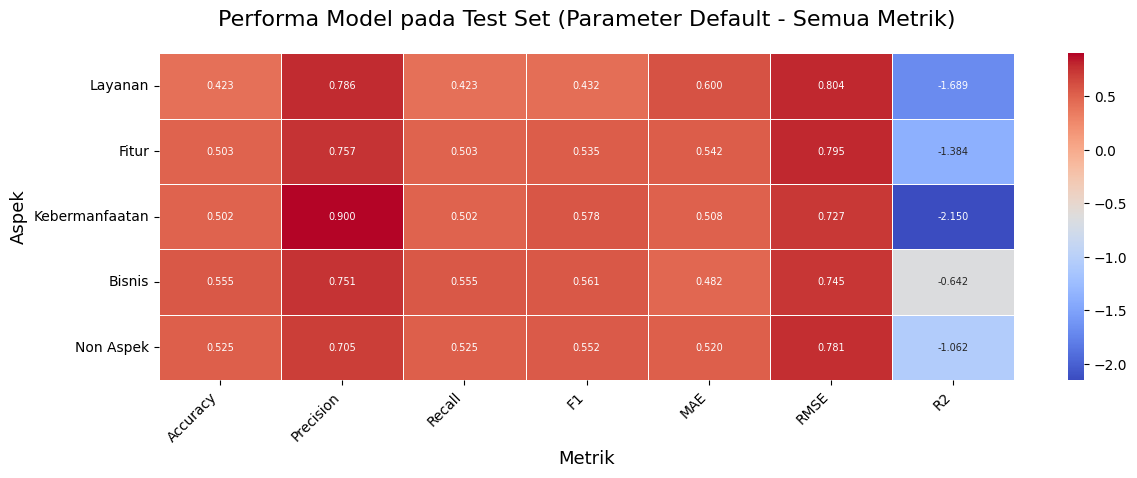



--- Visualisasi Semua Metrik Setelah Tuning ---
Heatmap 'Performa Model pada Test Set (Setelah Tuning - Semua Metrik)' disimpan ke: model/visualisasi_heatmap_semua_metrik\heatmap_all_metrics_tuned.png


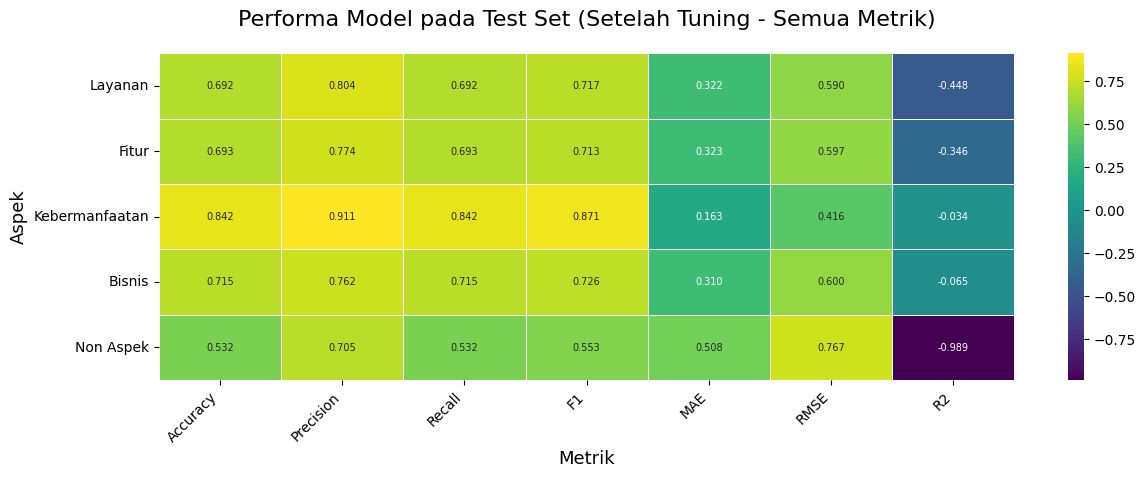



--- Visualisasi Perbandingan Semua Metrik (Setelah - Sebelum Tuning) ---
Heatmap 'Peningkatan Metrik Setelah Tuning (Nilai Positif = Lebih Baik)' disimpan ke: model/visualisasi_heatmap_semua_metrik\heatmap_all_metrics_difference.png


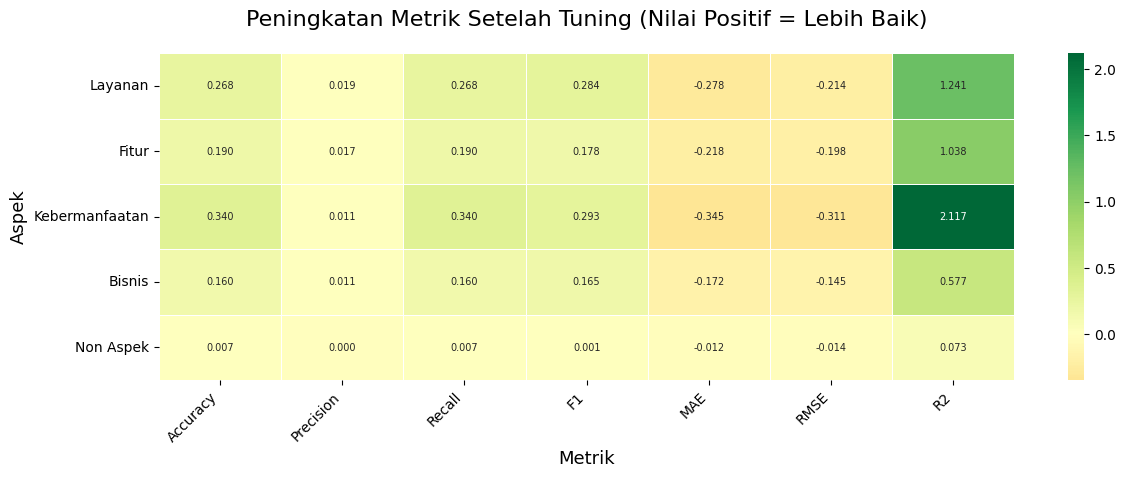



Proses visualisasi heatmap ringkasan semua metrik selesai.


In [143]:
output_folder_visualisasi = "model/visualisasi_heatmap_semua_metrik" # Nama folder disesuaikan
os.makedirs(output_folder_visualisasi, exist_ok=True)

def plot_semua_metrik_heatmap(df_metrics_input, plot_title, output_filename,
                               vmin_val=None, vmax_val=None, center_val=None, cmap_color="viridis"):
    """Fungsi untuk membuat dan menyimpan plot heatmap untuk DataFrame metrik."""
    if not isinstance(df_metrics_input, pd.DataFrame) or df_metrics_input.empty:
        print(f"Input bukan DataFrame yang valid atau DataFrame kosong. Heatmap untuk '{plot_title}' tidak dibuat.")
        return

    df_to_plot = df_metrics_input.copy()
    # Pastikan semua kolom adalah numerik untuk heatmap, paksa error menjadi NaN
    for col in df_to_plot.columns:
        df_to_plot[col] = pd.to_numeric(df_to_plot[col], errors='coerce')
    
    # Hapus baris atau kolom yang semua nilainya menjadi NaN setelah konversi
    df_to_plot.dropna(axis=0, how='all', inplace=True)
    df_to_plot.dropna(axis=1, how='all', inplace=True)

    if df_to_plot.empty:
        print(f"DataFrame menjadi kosong setelah membersihkan NaN. Heatmap untuk '{plot_title}' tidak dibuat.")
        return

    num_metrics = df_to_plot.shape[1]
    num_aspects = df_to_plot.shape[0]
    plt.figure(figsize=(max(8, num_metrics * 1.8), max(5, num_aspects * 0.7))) # Ukuran disesuaikan

    sns.heatmap(df_to_plot, annot=True, fmt=".3f", cmap=cmap_color, linewidths=.5,
                vmin=vmin_val, vmax=vmax_val, center=center_val, annot_kws={"size": 7})
    plt.title(plot_title, fontsize=16, pad=20)
    plt.ylabel("Aspek", fontsize=13)
    plt.xlabel("Metrik", fontsize=13)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout(pad=1.5)
    
    filepath = os.path.join(output_folder_visualisasi, output_filename)
    try:
        plt.savefig(filepath)
        print(f"Heatmap '{plot_title}' disimpan ke: {filepath}")
    except Exception as e:
        print(f"Gagal menyimpan heatmap '{output_filename}': {e}")
    
    plt.show() # Tampilkan plot di Jupyter
    plt.close() # Tutup figur

df_before_tuning_all = pd.DataFrame()
if 'all_aspect_test_metrics_default' in locals() and isinstance(all_aspect_test_metrics_default, dict) and all_aspect_test_metrics_default:
    try:
        df_before_tuning_all = pd.DataFrame.from_dict(all_aspect_test_metrics_default, orient='index')
        if 'aspect_list' in locals() and isinstance(aspect_list, list) and aspect_list:
            valid_aspects_reindex_before = [asp for asp in aspect_list if asp in df_before_tuning_all.index]
            if valid_aspects_reindex_before:
                 df_before_tuning_all = df_before_tuning_all.reindex(valid_aspects_reindex_before)
    except Exception as e:
        print(f"Error saat membuat DataFrame dari 'all_aspect_test_metrics_default': {e}")
else:
    print("Peringatan: Variabel 'all_aspect_test_metrics_default' tidak ditemukan, bukan dictionary, atau kosong.")

df_after_tuning_all = pd.DataFrame()
if 'all_aspect_test_metrics' in locals() and isinstance(all_aspect_test_metrics, dict) and all_aspect_test_metrics:
    try:
        df_after_tuning_all = pd.DataFrame.from_dict(all_aspect_test_metrics, orient='index')
        if 'aspect_list' in locals() and isinstance(aspect_list, list) and aspect_list:
            valid_aspects_reindex_after = [asp for asp in aspect_list if asp in df_after_tuning_all.index]
            if valid_aspects_reindex_after:
                df_after_tuning_all = df_after_tuning_all.reindex(valid_aspects_reindex_after)
    except Exception as e:
        print(f"Error saat membuat DataFrame dari 'all_aspect_test_metrics': {e}")
else:
    print("Peringatan: Variabel 'all_aspect_test_metrics' tidak ditemukan, bukan dictionary, atau kosong.")

# === 1. VISUALISASI SEMUA METRIK SEBELUM TUNING ===
print("\n\n--- Visualisasi Semua Metrik Sebelum Tuning (Parameter Default) ---")
if not df_before_tuning_all.empty:
    plot_semua_metrik_heatmap(
        df_before_tuning_all, # Kirim semua kolom yang ada
        "Performa Model pada Test Set (Parameter Default - Semua Metrik)",
        "heatmap_all_metrics_default.png",
        vmin_val=None, vmax_val=None, # Biarkan Seaborn menentukan skala otomatis
        cmap_color="coolwarm"
    )
else:
    print("Tidak ada data 'Sebelum Tuning' yang valid untuk divisualisasikan.")

# === 2. VISUALISASI SEMUA METRIK SETELAH TUNING ===
print("\n\n--- Visualisasi Semua Metrik Setelah Tuning ---")
if not df_after_tuning_all.empty:
    plot_semua_metrik_heatmap(
        df_after_tuning_all, # Kirim semua kolom yang ada
        "Performa Model pada Test Set (Setelah Tuning - Semua Metrik)",
        "heatmap_all_metrics_tuned.png",
        vmin_val=None, vmax_val=None,
        cmap_color="viridis" # Atau 'Greens', 'Blues', dll.
    )
else:
    print("Tidak ada data 'Setelah Tuning' yang valid untuk divisualisasikan.")


# === 3. VISUALISASI PERBANDINGAN SEMUA METRIK (SETELAH - SEBELUM TUNING) ===
print("\n\n--- Visualisasi Perbandingan Semua Metrik (Setelah - Sebelum Tuning) ---")
if not df_before_tuning_all.empty and not df_after_tuning_all.empty:
    # Gabungkan berdasarkan aspek yang sama dan kolom metrik yang sama
    common_aspects_for_diff = df_before_tuning_all.index.intersection(df_after_tuning_all.index)
    # Untuk kolom, kita ambil irisan dari kolom yang ada di kedua DataFrame
    common_cols_for_diff = df_before_tuning_all.columns.intersection(df_after_tuning_all.columns)

    if len(common_aspects_for_diff) > 0 and len(common_cols_for_diff) > 0:
        df_before_common_all = df_before_tuning_all.loc[common_aspects_for_diff, common_cols_for_diff]
        df_after_common_all = df_after_tuning_all.loc[common_aspects_for_diff, common_cols_for_diff]
        
        # Pastikan data numerik sebelum pengurangan
        df_before_numeric_all = df_before_common_all.apply(pd.to_numeric, errors='coerce')
        df_after_numeric_all = df_after_common_all.apply(pd.to_numeric, errors='coerce')

        df_difference_all = df_after_numeric_all - df_before_numeric_all
        
        if not df_difference_all.empty:
            plot_semua_metrik_heatmap(
                df_difference_all,
                "Peningkatan Metrik Setelah Tuning (Nilai Positif = Lebih Baik)",
                "heatmap_all_metrics_difference.png",
                center_val=0, 
                cmap_color="RdYlGn" 
            )
        else:
            print("DataFrame perbedaan menjadi kosong setelah pemrosesan.")
    else:
        print("Tidak ada aspek atau metrik umum yang sama antara data sebelum dan sesudah tuning untuk dibandingkan.")
else:
    print("Data 'Sebelum Tuning' atau 'Setelah Tuning' tidak lengkap untuk membuat heatmap perbandingan.")

print("\n\nProses visualisasi heatmap ringkasan semua metrik selesai.")